In [51]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install plotly


In [63]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [1]:
#Libraries requried for Initial Stages- Data Loading, Data Preprocessing, Handling Outlier, Data Visualization,
#Feature Selection, Text Field Preprocessing

import pandas as pd  # Data manipulation and analysis library
import numpy as np  # Numerical computing library
import matplotlib.pyplot as plt  # Plotting and visualization library
import seaborn as sns  # Statistical data visualization library based on Matplotlib
import plotly.express as px  # High-level interface for drawing attractive and informative statistical graphics
from wordcloud import WordCloud  # Library for creating word cloud images
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Preprocessing module for label encoding and feature scaling
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to feature vectors based on term frequency-inverse document frequency
from sklearn.decomposition import TruncatedSVD  # Dimensionality reduction technique using truncated singular value decomposition
import re  # Regular expression library for string operations
from bs4 import BeautifulSoup  # Library for pulling data out of HTML and XML files
from nltk.corpus import stopwords  # Natural Language Toolkit - corpus readers for stopwords
from nltk.tokenize import word_tokenize  # Natural Language Toolkit - tokenizers for splitting text into tokens
import nltk  # Natural Language Toolkit - suite of libraries and programs for symbolic and statistical natural language processing
from nltk.stem import WordNetLemmatizer  # Natural Language Toolkit - interface for lemmatizing tokens
from nltk.stem import PorterStemmer  # Natural Language Toolkit - interface for stemming tokens


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:


json_file_path = 'D:\\Msc Data Science and Advanced Computing\\CSMAI21 - Artificial Intelligence and Machine Learning\\Assignment\\research\\renttherunway_final_data.json'

# Load the dataset
runway_df = pd.read_json(json_file_path, lines=True)



In [4]:

# Display the first few rows of the dataframe
runway_df.head()

fit  user_id bust size  item_id  weight  rating     rented for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

In [5]:
# Basic info
print(runway_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB
None


In [6]:
# Summary statistics for numerical features
print(runway_df.describe())


             user_id       item_id         rating           size  \
count  192544.000000  1.925440e+05  192462.000000  192544.000000   
mean   499494.100149  1.045684e+06       9.092371      12.245175   
std    289059.719328  8.053148e+05       1.430044       8.494877   
min         9.000000  1.233730e+05       2.000000       0.000000   
25%    250654.250000  1.950760e+05       8.000000       8.000000   
50%    499419.000000  9.483960e+05      10.000000      12.000000   
75%    750974.000000  1.678888e+06      10.000000      16.000000   
max    999997.000000  2.966087e+06      10.000000      58.000000   

                 age  
count  191584.000000  
mean       33.871017  
std         8.058083  
min         0.000000  
25%        29.000000  
50%        32.000000  
75%        37.000000  
max       117.000000  


## Data Preprocessing

In [7]:
runway_df.shape

(192544, 15)

In [8]:
runway_df = runway_df.drop_duplicates()

#replace index after dropping records
runway_df.reset_index(drop=True, inplace=True)


In [9]:
runway_df.shape

(192355, 15)

In [10]:
# Check for missing values
missing_values = runway_df.isnull().sum()
total_rows = len(runway_df)

# to Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

# Display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
print(missing_data)


                Missing Values  Missing Percentage
fit                          0            0.000000
user_id                      0            0.000000
bust size                18392            9.561488
item_id                      0            0.000000
weight                   29955           15.572769
rating                      81            0.042110
rented for                  10            0.005199
review_text                  0            0.000000
body type                14625            7.603130
review_summary               0            0.000000
category                     0            0.000000
height                     675            0.350914
size                         0            0.000000
age                        960            0.499077
review_date                  0            0.000000


In [11]:

columns_to_check = ['fit', 'user_id', 'bust size', 'item_id', 'weight', 
                    'rating', 'rented for', 'body type', 'category', 
                    'height', 'size', 'age', 'review_date']

# Find the number of unique values in each column
unique_counts = runway_df[columns_to_check].nunique()

# Print the number of unique values
print("Number of Unique Values in Each Column:")
print(unique_counts)

# to print value counts for 'rating'
print("\nValue Counts for 'rating':")
print(runway_df['rating'].value_counts())


Number of Unique Values in Each Column:
fit                 3
user_id        105571
bust size         106
item_id          5850
weight            190
rating              5
rented for          9
body type           7
category           68
height             24
size               56
age                89
review_date      2274
dtype: int64

Value Counts for 'rating':
10.0    124413
8.0      53340
6.0      10688
4.0       2787
2.0       1046
Name: rating, dtype: int64


In [12]:
runway_df.columns = ['Fit', 'User_Id', 'Bust_Size', 'Item_Id', 'Weight', 'Rating',
                'Rented_For', 'Review_Text', 'Body_Type', 'Review_Summary',
                'Category', 'Height', 'Size', 'Age', 'Review_Date']

In [13]:
# Remove rows where 'Rating', 'Rented_For', or 'Height' are missing
runway_df = runway_df.dropna(subset=['Rating', 'Rented_For', 'Height'])


In [14]:

# to Check for missing values
print(runway_df.isnull().sum())


Fit                   0
User_Id               0
Bust_Size         18251
Item_Id               0
Weight            29699
Rating                0
Rented_For            0
Review_Text           0
Body_Type         14496
Review_Summary        0
Category              0
Height                0
Size                  0
Age                 951
Review_Date           0
dtype: int64


In [15]:
# to Check if all weight entries are in lbs (ignoring NaNs)
all_lbs = runway_df['Weight'].dropna().str.endswith('lbs').all()
print(f"All weight entries in lbs: {all_lbs}")

if all_lbs:
    # Remove 'lbs' and convert to int
    runway_df['Weight(lbs)'] = runway_df['Weight'].str.rstrip('lbs').astype(float).astype('Int64')
    runway_df.drop('Weight', axis=1, inplace=True)  # Drop the original 'Weight' column

All weight entries in lbs: True


In [16]:
# Converting 'Review_Date' to datetime format
runway_df['Review_Date'] = pd.to_datetime(runway_df['Review_Date'])


In [17]:
# Converting 'Rating' to int since there are no null values
runway_df['Rating'] = runway_df['Rating'].astype(int)


In [18]:
# to convert height from feet to cm
def convert_height_to_cm(height_str):
    if isinstance(height_str, str):
        parts = height_str.split("' ")
        feet = int(parts[0])
        inches = int(parts[1].replace('"', ''))
        total_inches = feet * 12 + inches
        return total_inches * 2.54  # Convert inches to cm
    else:
        return None  # In case there are any NaN values

runway_df['Height(cm)'] = runway_df['Height'].apply(convert_height_to_cm)


In [19]:

# Drop the old 'Height' column as new Height(cm) is created
runway_df = runway_df.drop('Height', axis=1)

In [20]:
# Reordering the DataFrame columns
runway_df = runway_df[[ 'User_Id', 'Item_Id', 'Bust_Size', 'Height(cm)', 'Weight(lbs)', 'Size', 'Body_Type', 'Age',
             'Fit', 'Category', 'Rented_For', 'Review_Text', 'Review_Summary', 'Review_Date', 'Rating']]


In [21]:
# Basic info
print(runway_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 191589 entries, 0 to 192354
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   User_Id         191589 non-null  int64         
 1   Item_Id         191589 non-null  int64         
 2   Bust_Size       173338 non-null  object        
 3   Height(cm)      191589 non-null  float64       
 4   Weight(lbs)     161890 non-null  Int64         
 5   Size            191589 non-null  int64         
 6   Body_Type       177093 non-null  object        
 7   Age             190638 non-null  float64       
 8   Fit             191589 non-null  object        
 9   Category        191589 non-null  object        
 10  Rented_For      191589 non-null  object        
 11  Review_Text     191589 non-null  object        
 12  Review_Summary  191589 non-null  object        
 13  Review_Date     191589 non-null  datetime64[ns]
 14  Rating          191589 non-null  int

In [22]:
# Convert 'Fit' and 'Body_Type' columns to category dtype
runway_df['Fit'] = runway_df['Fit'].astype('category')
runway_df['Body_Type'] = runway_df['Body_Type'].astype('category')
runway_df['Category'] = runway_df['Category'].astype('category')
runway_df['Rented_For'] = runway_df['Rented_For'].astype('category')

# Verify the changes
print(runway_df.dtypes)


User_Id                    int64
Item_Id                    int64
Bust_Size                 object
Height(cm)               float64
Weight(lbs)                Int64
Size                       int64
Body_Type               category
Age                      float64
Fit                     category
Category                category
Rented_For              category
Review_Text               object
Review_Summary            object
Review_Date       datetime64[ns]
Rating                     int32
dtype: object


In [23]:

# to Check for missing values
print(runway_df.isnull().sum())


User_Id               0
Item_Id               0
Bust_Size         18251
Height(cm)            0
Weight(lbs)       29699
Size                  0
Body_Type         14496
Age                 951
Fit                   0
Category              0
Rented_For            0
Review_Text           0
Review_Summary        0
Review_Date           0
Rating                0
dtype: int64


In [24]:
# Group by 'Size' and get the mode of 'Bust_Size' for each 'Size'
bust_size_mode_by_size = runway_df.groupby('Size')['Bust_Size'].agg(lambda x: pd.Series.mode(x).iloc[0])

# Defining a function to apply the mode to missing values
def impute_bust_size(row):
    if pd.isna(row['Bust_Size']):
        # Get the mode for the corresponding 'Size'
        return bust_size_mode_by_size[row['Size']]
    else:
        return row['Bust_Size']

# Appling the function to each row in the DataFrame
runway_df['Bust_Size'] = runway_df.apply(impute_bust_size, axis=1)

In [25]:
# Calculating the mean 'Weight(lbs)' for each group
mean_weights = runway_df.groupby(['Bust_Size', 'Height(cm)', 'Size'])['Weight(lbs)'].transform('mean')

# Filling missing 'Weight(lbs)' values with the calculated group mean
# Since the mean will be a float, rounding it before filling to match 'Int64' expectations
runway_df['Weight(lbs)'] = runway_df['Weight(lbs)'].fillna(mean_weights.round())



In [26]:
# Dropping rows where 'Weight(lbs)' is NaN
runway_df = runway_df.dropna(subset=['Weight(lbs)'])

In [27]:
runway_df.isnull().sum()

User_Id               0
Item_Id               0
Bust_Size             0
Height(cm)            0
Weight(lbs)           0
Size                  0
Body_Type         14323
Age                 926
Fit                   0
Category              0
Rented_For            0
Review_Text           0
Review_Summary        0
Review_Date           0
Rating                0
dtype: int64

In [28]:
# Group by 'Weight(lbs)', 'Bust_Size', 'Height(cm)', and 'Size' and find the mode of 'Body_Type'
mode_body_type_df = runway_df.groupby(['Weight(lbs)', 'Bust_Size', 'Height(cm)', 'Size'])['Body_Type'].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan).reset_index(name='Mode_Body_Type')

# Merging the mode 'Body_Type' back into the original DataFrame with a specified suffix
runway_df = pd.merge(runway_df, mode_body_type_df, on=['Weight(lbs)', 'Bust_Size', 'Height(cm)', 'Size'], how='left', suffixes=('_left', '_right'))

# to Check if 'Body_Type' contains NaN values before filling
if 'Body_Type' in runway_df.columns and runway_df['Body_Type'].isnull().any():
    # Fill in missing 'Body_Type' values with the mode 'Body_Type' for the corresponding group
    runway_df['Body_Type'] = runway_df['Body_Type'].fillna(runway_df['Mode_Body_Type'])

# to Drop the auxiliary 'Mode_Body_Type' column as it's no longer needed
runway_df.drop('Mode_Body_Type', axis=1, inplace=True)


In [29]:
runway_df.isnull().sum()

User_Id              0
Item_Id              0
Bust_Size            0
Height(cm)           0
Weight(lbs)          0
Size                 0
Body_Type         1271
Age                926
Fit                  0
Category             0
Rented_For           0
Review_Text          0
Review_Summary       0
Review_Date          0
Rating               0
dtype: int64

In [30]:
# to Drop rows where 'age' is NaN as it cant be inferred from any other fields
runway_df = runway_df.dropna(subset=['Age'])

In [31]:
# to Drop rows where 'Body_Type' is NaN
runway_df = runway_df.dropna(subset=['Body_Type'])

In [32]:

# to Verify the operation by checking for null values again
print(runway_df.isnull().sum())

User_Id           0
Item_Id           0
Bust_Size         0
Height(cm)        0
Weight(lbs)       0
Size              0
Body_Type         0
Age               0
Fit               0
Category          0
Rented_For        0
Review_Text       0
Review_Summary    0
Review_Date       0
Rating            0
dtype: int64


In [33]:
# Function to check if a column contains only numbers (integers or floats)
def check_numeric(column):
    if pd.api.types.is_integer_dtype(column):
        return column.apply(lambda x: isinstance(x, (int, np.integer))).all()
    elif pd.api.types.is_float_dtype(column):
        return column.apply(lambda x: isinstance(x, (float, np.floating))).all()
    else:
        return False

# Applying the check_numeric function to each column in the DataFrame
for column_name in runway_df.columns:
    if pd.api.types.is_numeric_dtype(runway_df[column_name]):
        print(f"{column_name} contains only numbers: {check_numeric(runway_df[column_name])}")


User_Id contains only numbers: True
Item_Id contains only numbers: True
Height(cm) contains only numbers: True
Weight(lbs) contains only numbers: True
Size contains only numbers: True
Age contains only numbers: True
Rating contains only numbers: True


In [34]:
runway_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188482 entries, 0 to 190641
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   User_Id         188482 non-null  int64         
 1   Item_Id         188482 non-null  int64         
 2   Bust_Size       188482 non-null  object        
 3   Height(cm)      188482 non-null  float64       
 4   Weight(lbs)     188482 non-null  Int64         
 5   Size            188482 non-null  int64         
 6   Body_Type       188482 non-null  category      
 7   Age             188482 non-null  float64       
 8   Fit             188482 non-null  category      
 9   Category        188482 non-null  category      
 10  Rented_For      188482 non-null  category      
 11  Review_Text     188482 non-null  object        
 12  Review_Summary  188482 non-null  object        
 13  Review_Date     188482 non-null  datetime64[ns]
 14  Rating          188482 non-null  int

In [35]:
unique_counts = runway_df.nunique()

# To print the unique counts for each column
for column in runway_df.columns:
    print(f"{column}: {runway_df[column].nunique()} unique values")


User_Id: 103119 unique values
Item_Id: 5842 unique values
Bust_Size: 101 unique values
Height(cm): 24 unique values
Weight(lbs): 193 unique values
Size: 56 unique values
Body_Type: 7 unique values
Age: 89 unique values
Fit: 3 unique values
Category: 68 unique values
Rented_For: 9 unique values
Review_Text: 187204 unique values
Review_Summary: 151729 unique values
Review_Date: 2270 unique values
Rating: 5 unique values


In [36]:
# To print unique values for each column
for column in runway_df.columns:
    print(f"{column}: {runway_df[column].unique()}")


User_Id: [420272 273551 360448 ... 442241 961120 123612]
Item_Id: [2260466  153475 1063761 ... 2370908  303978 2751662]
Bust_Size: ['34d' '34b' '34c' '32b' '34d+' '36d' '36a' '32d+' '36c' '32c' '32dd'
 '30dd' '32d' '36b' '34a' '34dd' '32a' '38c' '34ddd/e' '38d+' '38a' '38b'
 '38d' '36ddd/e' '38dd' '38f' '42dd' '40dd' '30ddd/e' '32ddd/e' '36dd'
 '36d+' '40d' '28dd' '42c' '30d' '30b' '42d' '34aa' '32aa' '36f' '28c'
 '36aa' '34g' '32f' '42ddd/e' '40c' '34f' '28g' '28aa' '36g' '28f'
 '44ddd/e' '40ddd/e' '30c' '30aa' '44dd' '32i' '32g' '30g' '30h' '30a'
 '34j' '38ddd/e' '32h' '28a' '44d' '40h' '38g' '40g' '28b' '34h' '36j'
 '40f' '36h' '28ddd/e' '44f' '34i' '30f' '36i' '30i' '28h' '42b' '42j'
 '38aa' '38i' '48dd' '28d' '46ddd/e' '42g' '48d' '38h' '40b' '40j' '32j'
 '38j' '44b' '44c' '44g' '42f' '44h']
Height(cm): [172.72 167.64 162.56 165.1  175.26 160.02 157.48 170.18 154.94 177.8
 182.88 147.32 185.42 180.34 152.4  149.86 142.24 187.96 190.5  144.78
 137.16 193.04 139.7  198.12]
Weight(lb

## Handling outlier

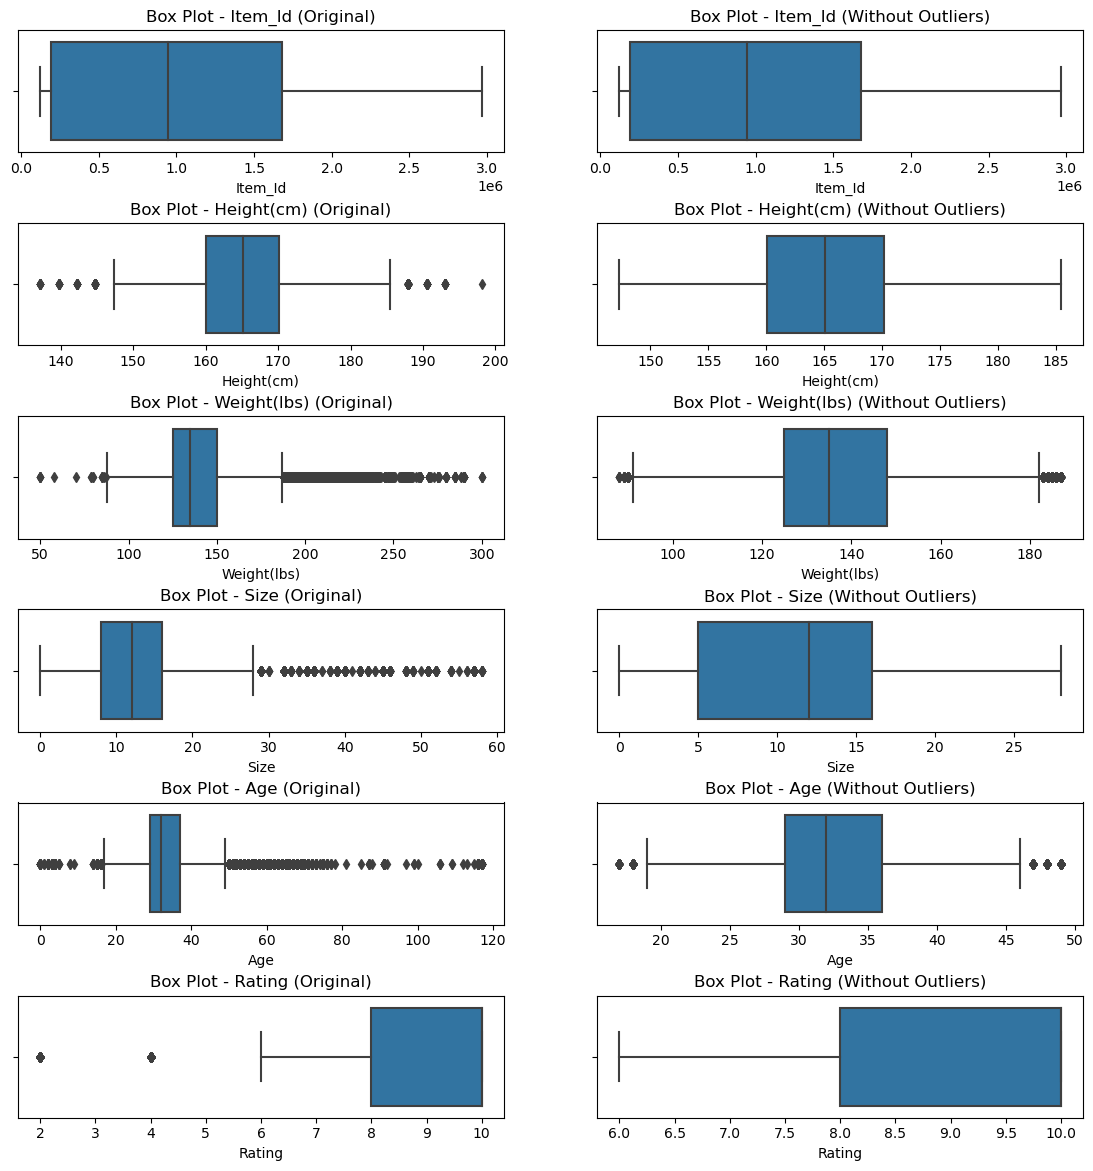


Outliers in Item_Id:
Series([], Name: Item_Id, dtype: int64)
Count: 0
Percentage of total data: 0.00%


Outliers in Height(cm):
615       142.24
764       187.96
3742      142.24
4128      190.50
6138      142.24
           ...  
186764    144.78
186997    193.04
189058    139.70
189847    190.50
190210    187.96
Name: Height(cm), Length: 244, dtype: float64
Count: 244
Percentage of total data: 0.13%


Outliers in Weight(lbs):
47        190
109       250
110       195
115       231
135       210
         ... 
190562    227
190569    192
190609    202
190618    245
190626    220
Name: Weight(lbs), Length: 6574, dtype: Int64
Count: 6574
Percentage of total data: 3.49%


Outliers in Size:
109       51
110       32
115       48
142       51
146       45
          ..
190550    45
190562    39
190602    35
190618    57
190626    35
Name: Size, Length: 5722, dtype: int64
Count: 5722
Percentage of total data: 3.04%


Outliers in Age:
2         116.0
7          65.0
31         50.0
39         

In [37]:
# List of numeric columns to check for outliers
numeric_columns = ['Item_Id', 'Height(cm)', 'Weight(lbs)', 'Size', 'Age', 'Rating']

# to Initialize a boolean series to mark rows without outliers
mask = pd.Series([True] * len(runway_df))

# to Initialize dictionaries to store outlier details
outlier_data = {}
outlier_count = {}
outlier_percentage = {}

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 2 * len(numeric_columns)))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_columns):
    # Calculate Q1, Q3, and IQR
    Q1 = runway_df[column].quantile(0.25)
    Q3 = runway_df[column].quantile(0.75)
    IQR = Q3 - Q1

    #  bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Box plot for the original data
    sns.boxplot(x=runway_df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot - {column} (Original)')

    # Identify outliers
    outliers = (runway_df[column] < lower_bound) | (runway_df[column] > upper_bound)

    # Box plot for the data without outliers
    sns.boxplot(x=runway_df.loc[~outliers, column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot - {column} (Without Outliers)')

    # Updating mask to identify non-outliers
    mask = mask & ~outliers

    # Storing outlier details
    outlier_data[column] = runway_df.loc[outliers, column]
    outlier_count[column] = outliers.sum()
    outlier_percentage[column] = (outliers.sum() / len(runway_df)) * 100

# visualizing the plots
plt.show()

# Printing outlier details
for column in numeric_columns:
    print(f'\nOutliers in {column}:')
    print(outlier_data[column])
    print(f'Count: {outlier_count[column]}')
    print(f'Percentage of total data: {outlier_percentage[column]:.2f}%\n')

# Applying mask to filter out outliers
runway_df_without_outliers = runway_df[mask]

# Output the shape of the original and the cleaned DataFrame
print("Original DataFrame shape:", runway_df.shape)
print("DataFrame shape without outliers:", runway_df_without_outliers.shape)


Number of removed outliers: 7022
Percentage of removed outliers: 3.73%


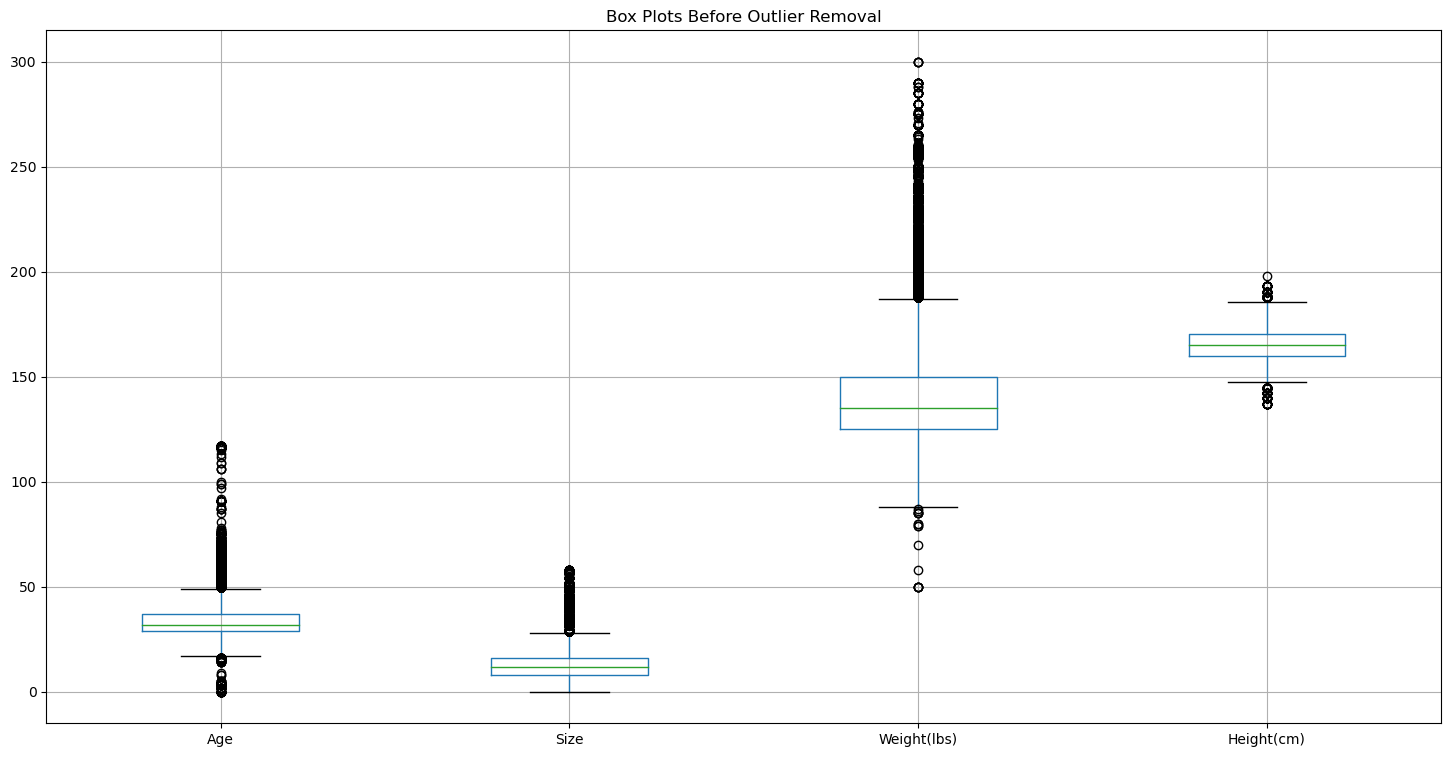

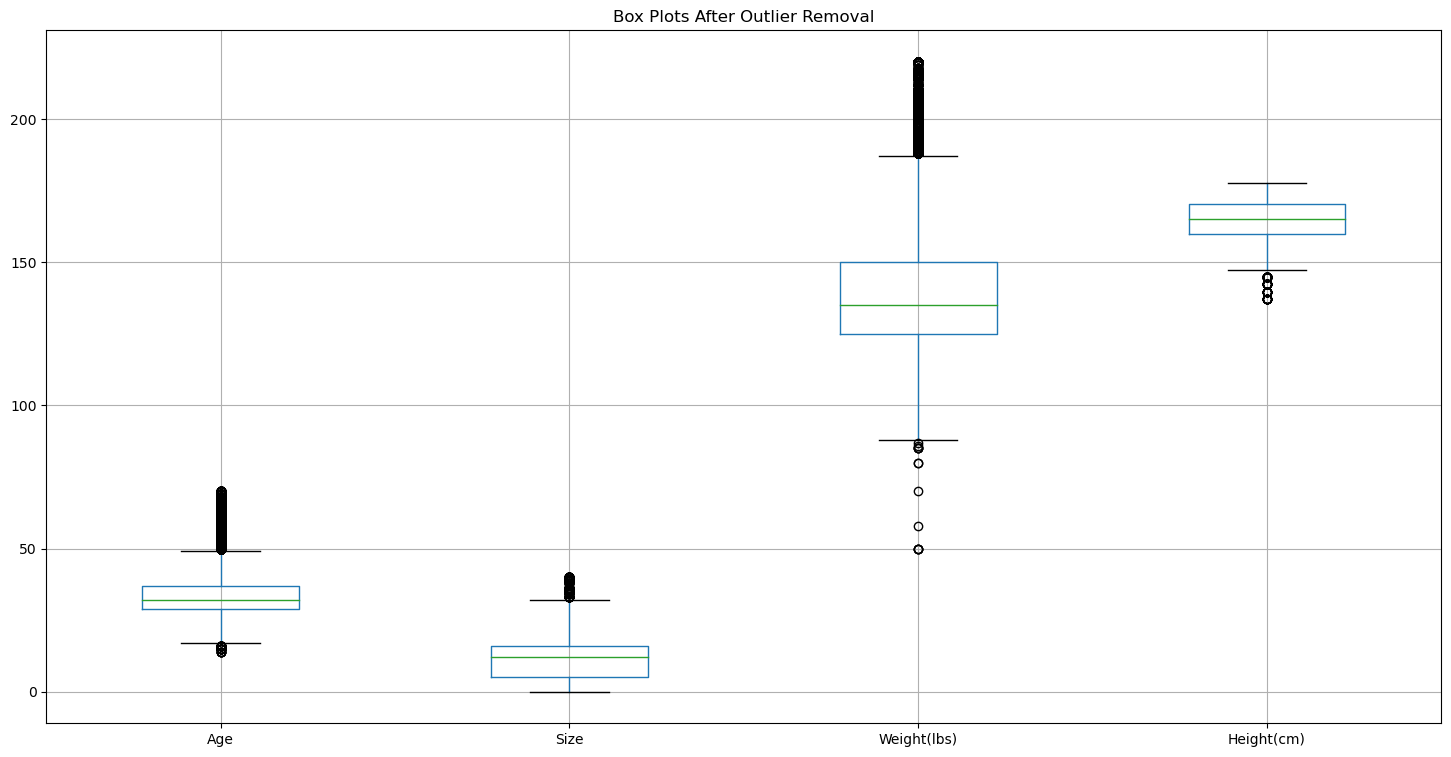

In [38]:
# List of specific conditions for outlier removal
conditions = [
    (runway_df['Age'] >= 0) & (runway_df['Age'] <= 10),
    (runway_df['Age'] > 70),
    (runway_df['Size'] > 40),
    (runway_df['Weight(lbs)'] > 220),
    (runway_df['Height(cm)'] > 180)
]


plt.figure(figsize=(18,9))
runway_df.boxplot(column=['Age', 'Size', 'Weight(lbs)', 'Height(cm)'])
plt.title('Box Plots Before Outlier Removal')

# To combine the conditions to identify rows to be removed
outliers_to_remove = runway_df[conditions[0] | conditions[1] | conditions[2] | conditions[3] | conditions[4]]

# To create a boolean series to mark rows without outliers
mask = ~runway_df.index.isin(outliers_to_remove.index)

# To apply mask to filter out rows with outliers
runway_df_cleaned = runway_df[mask]


plt.figure(figsize=(18,9))
runway_df_cleaned.boxplot(column=['Age', 'Size', 'Weight(lbs)', 'Height(cm)'])
plt.title('Box Plots After Outlier Removal')

# Display the count and percentage of removed outliers
removed_outliers_count = len(runway_df) - len(runway_df_cleaned)
removed_outliers_percentage = (removed_outliers_count / len(runway_df)) * 100

print(f"Number of removed outliers: {removed_outliers_count}")
print(f"Percentage of removed outliers: {removed_outliers_percentage:.2f}%")

# Show the plots
plt.show()


In [39]:
runway_df.shape

(188482, 15)

In [40]:
runway_df_cleaned.shape

(181460, 15)

In [41]:
runway_df_without_outliers.shape

(165747, 15)

## Data Visualization

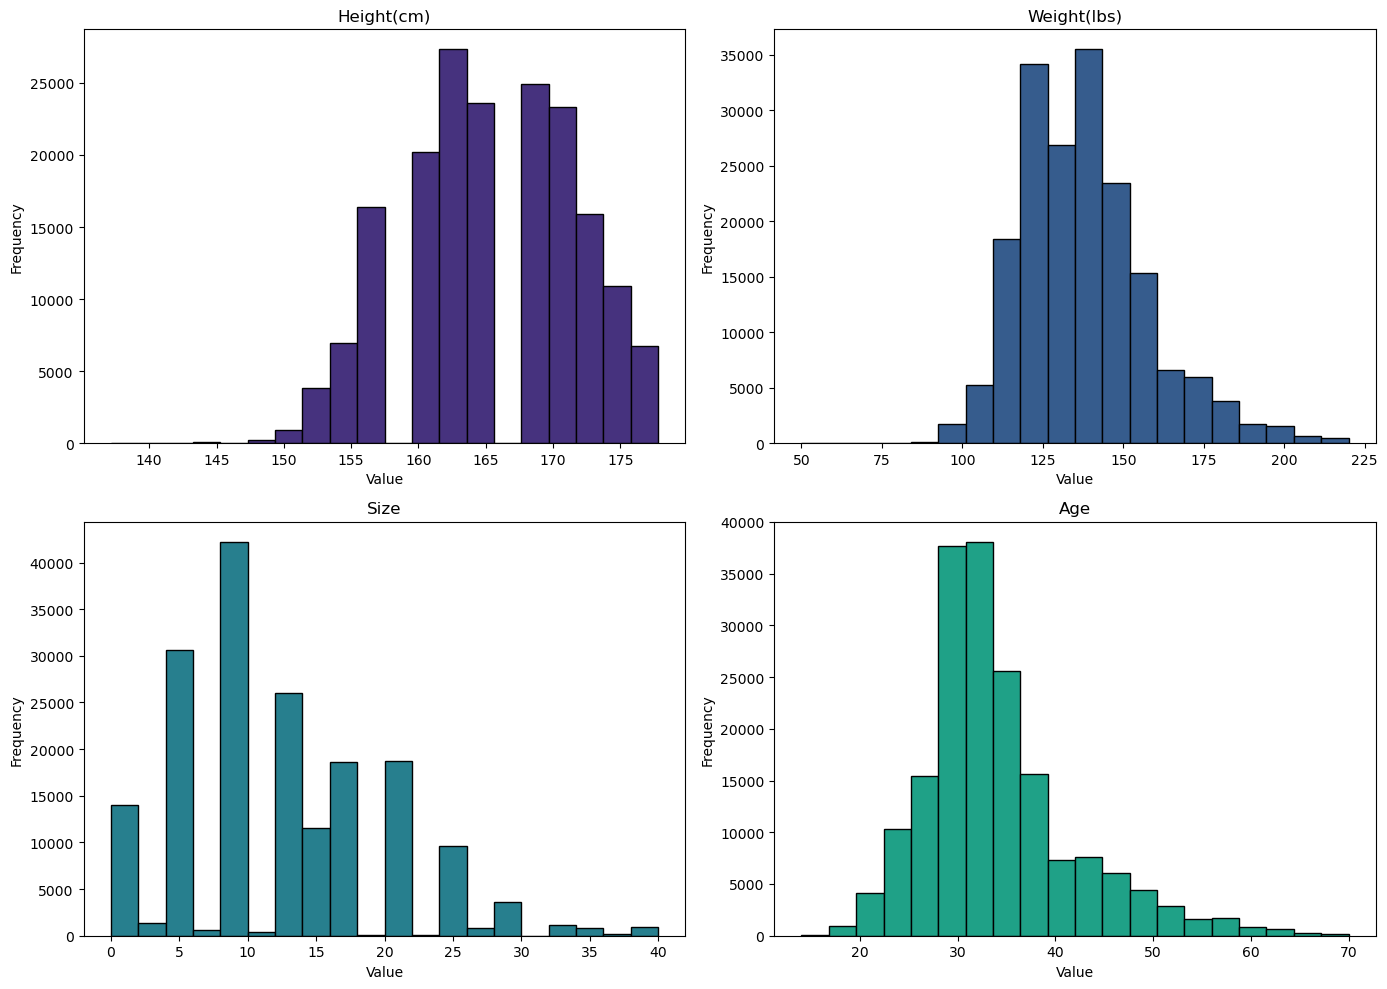

In [42]:
# to Load a seaborn viridis color palette
pastel_colors = sns.color_palette('viridis')

numeric_columns = ['Height(cm)', 'Weight(lbs)', 'Size', 'Age']

# to Create a histogram for each numeric column with a pastel color
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, column, color in zip(axes, numeric_columns, pastel_colors):
    ax.hist(runway_df_cleaned[column], bins=20, color=color, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


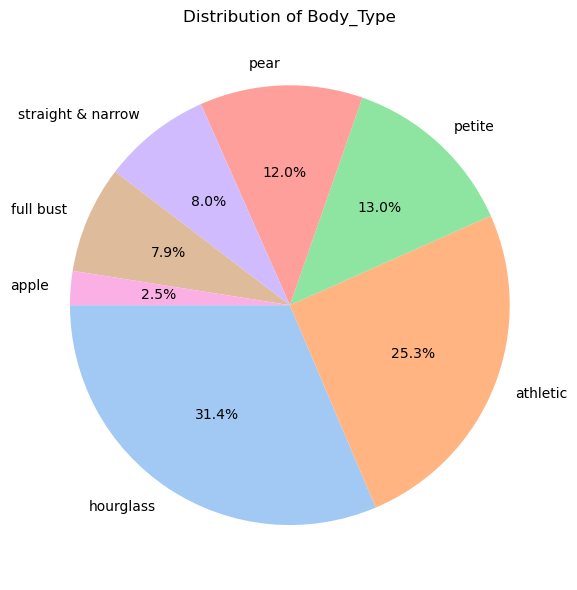

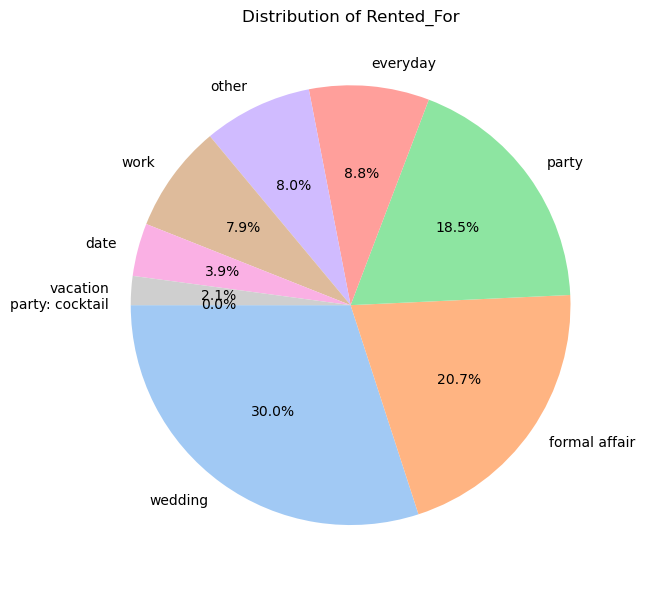

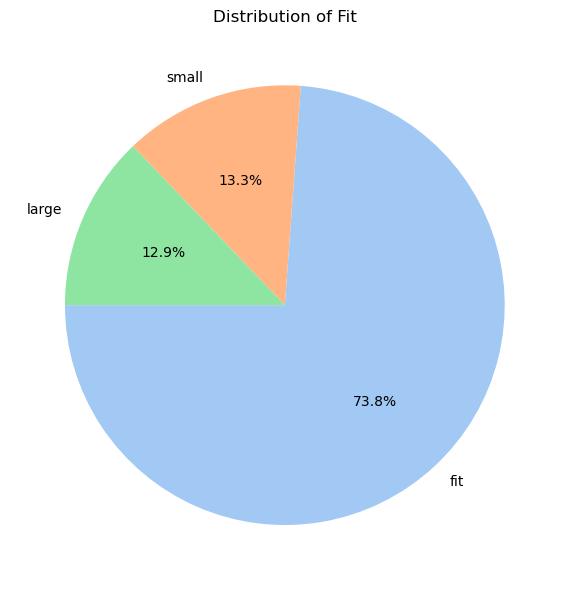

In [43]:
# Categorical features
categorical_features = ['Body_Type', 'Rented_For', 'Fit']
for feature in categorical_features:
    plt.figure(figsize=(8, 6)) 
    feature_counts = runway_df_cleaned[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%0.1f%%', startangle=180, colors=sns.color_palette('pastel'))
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()


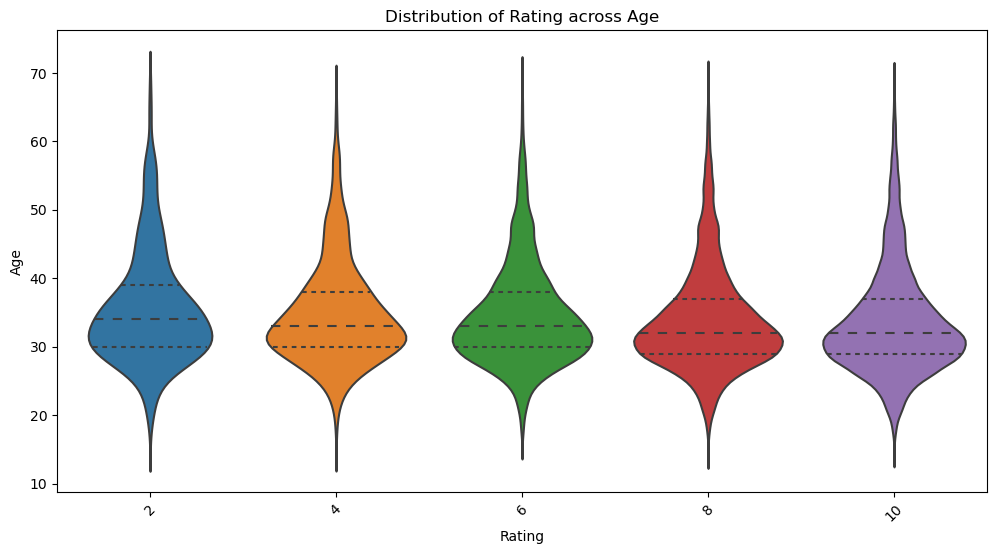

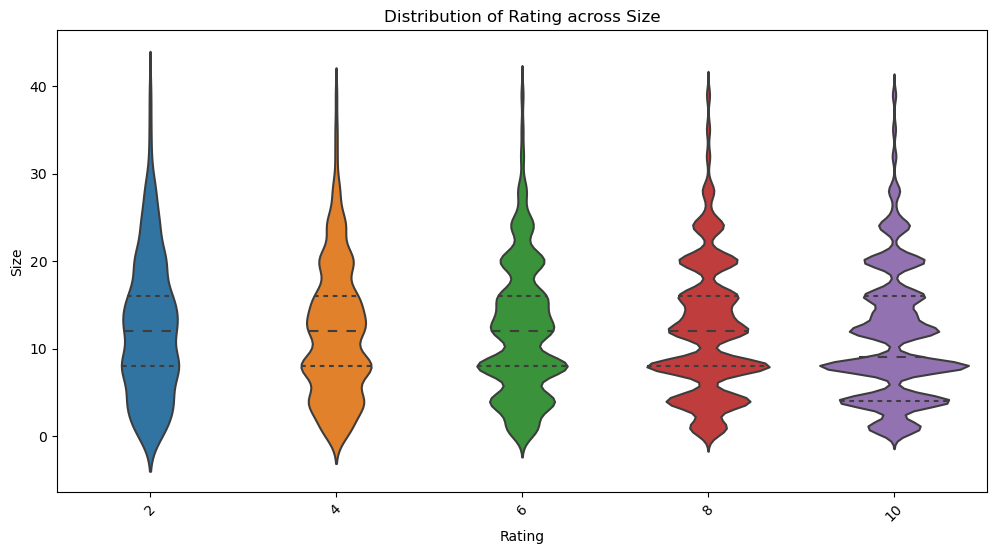

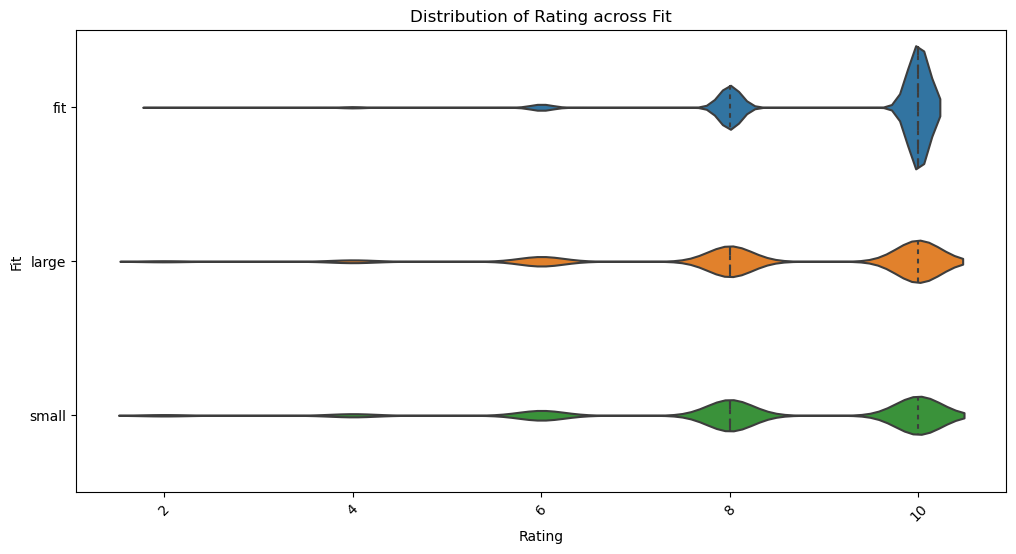

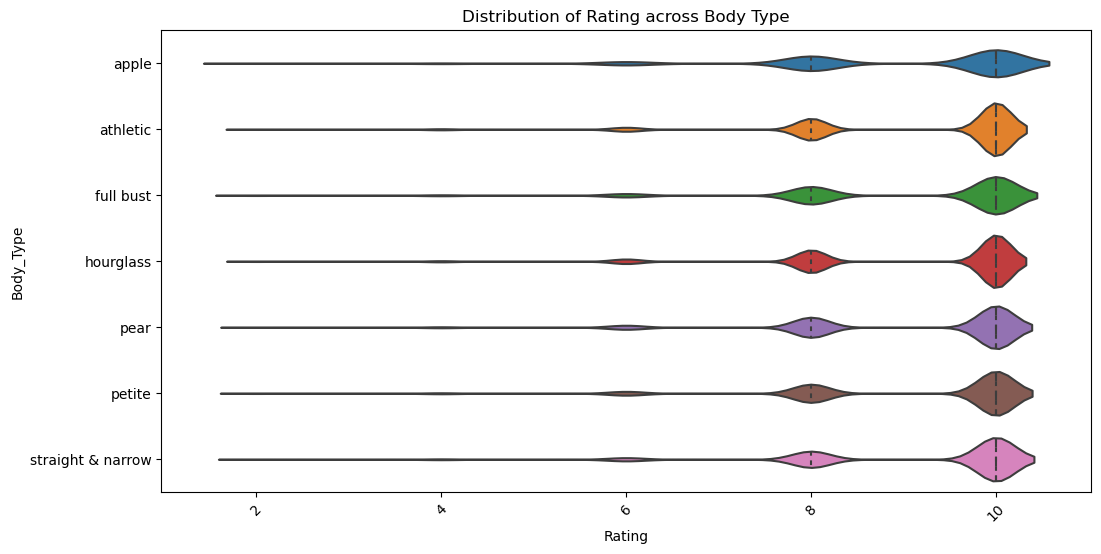

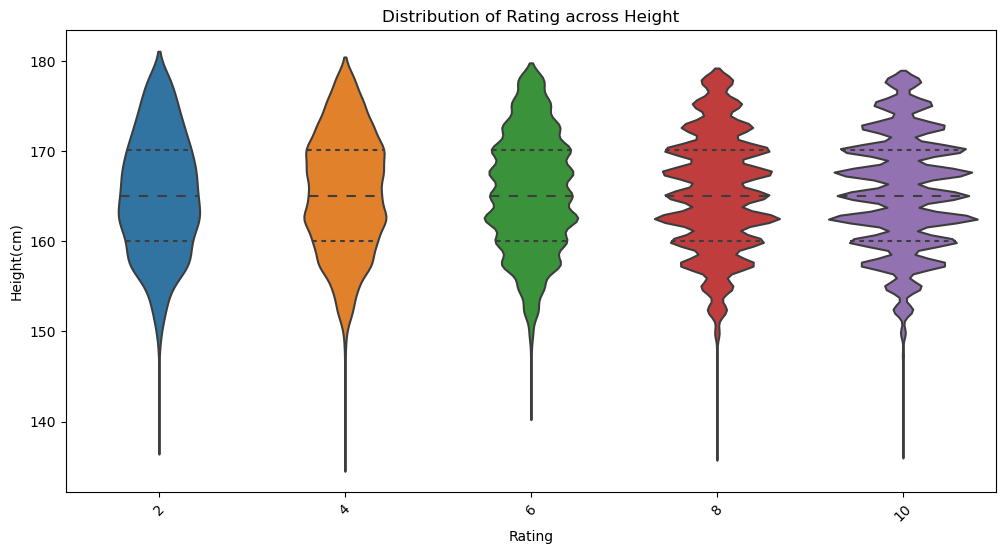

In [44]:
#violin plot for different features distribution across Rating
plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating', y='Age', data=runway_df_cleaned, inner="quartile")
plt.xticks(rotation=45)
plt.title('Distribution of Rating across Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating', y='Size', data=runway_df_cleaned, inner="quartile")
plt.xticks(rotation=45)
plt.title('Distribution of Rating across Size')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating', y='Fit', data=runway_df_cleaned, inner="quartile")
plt.xticks(rotation=45)
plt.title('Distribution of Rating across Fit')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating', y='Body_Type', data=runway_df_cleaned, inner="quartile")
plt.xticks(rotation=45)
plt.title('Distribution of Rating across Body Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating', y='Height(cm)', data=runway_df_cleaned, inner="quartile")
plt.xticks(rotation=45)
plt.title('Distribution of Rating across Height')
plt.show()



In [46]:
from plotly.offline import init_notebook_mode, iplot

# Enable Plotly in Jupyter Notebook as it is not enabled by default
init_notebook_mode(connected=True)


In [47]:
# to Convert 'Category' and 'Fit' columns to string type before concatenation
runway_df_cleaned['combined_feature'] = runway_df_cleaned['Category'].astype(str) + " - " + runway_df_cleaned['Fit'].astype(str)

# to Summarize the dataset for the combined feature
combined_counts = runway_df_cleaned['combined_feature'].value_counts().reset_index()
combined_counts.columns = ['combined_feature', 'count']

# to Plot a sunburst chart
fig = px.sunburst(
    combined_counts.head(20),  # Limiting to top 20 categories for readability
    path=['combined_feature'], 
    values='count',
    title='Top 20 Combined Feature Distribution'
)

fig.update_layout(width=700, height=700)
fig.show()


In [48]:
# Aggregating the data to get counts for each combination of 'Fit' and 'Rating'
sunburst_data = runway_df_cleaned.groupby(['Fit', 'Rating']).size().reset_index(name='Counts')

# to create the sunburst chart using the aggregated data
fig = px.sunburst(
    sunburst_data,
    path=['Fit', 'Rating'],  # Hierarchical data: 'Fit' is the parent, 'Rating' is the child
    values='Counts',  # The size of each segment
    color='Rating',  # tp Differentiate colors by 'Rating'
    color_continuous_scale='Plasma',
    title='Distribution of Ratings for Each Fit Category',
    width=800,  # to Set the width of the figure
    height=800  # to Set the height of the figure
)

# display the figure
fig.show()


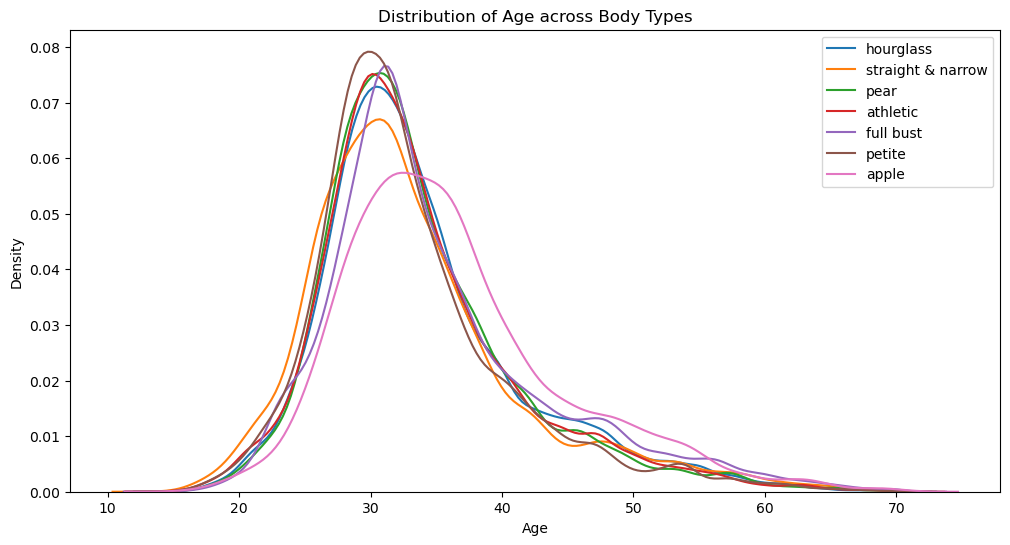

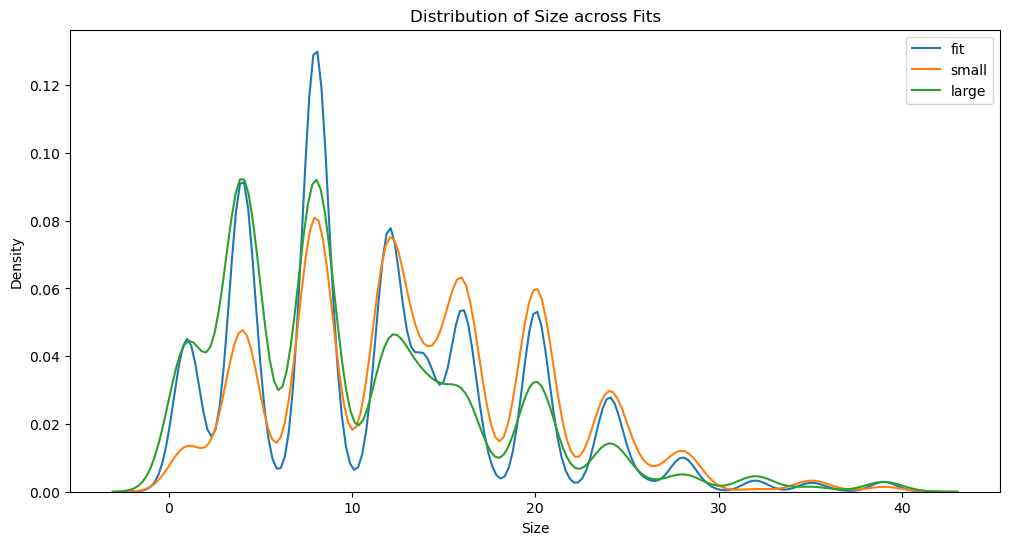

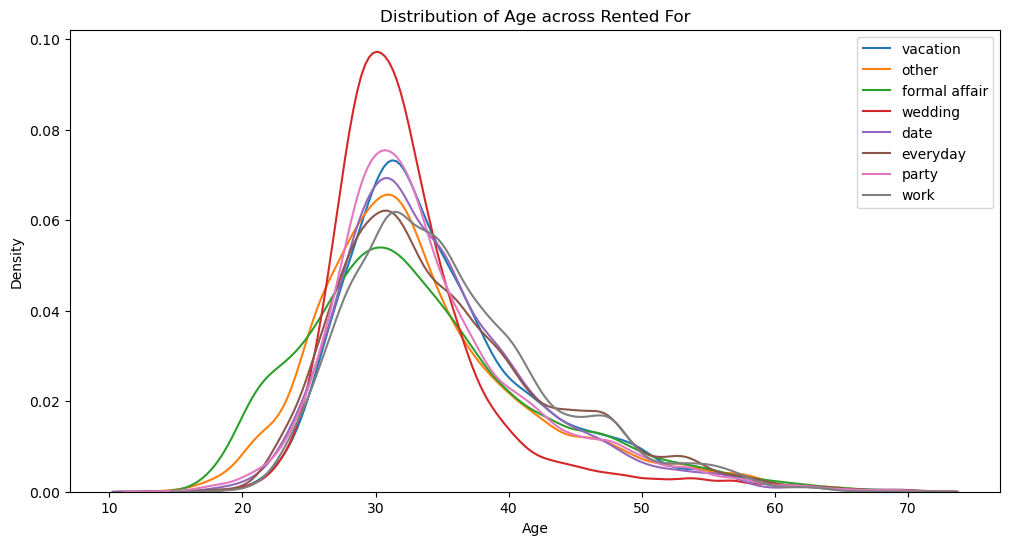

In [49]:
#density plot to compare distribution across different features
plt.figure(figsize=(12, 6))
for body_type in runway_df_cleaned['Body_Type'].unique():
    subset = runway_df_cleaned[runway_df_cleaned['Body_Type'] == body_type]
    sns.distplot(subset['Age'], hist=False, kde=True, label=body_type)
plt.title('Distribution of Age across Body Types')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for fit in runway_df_cleaned['Fit'].unique():
    subset = runway_df_cleaned[runway_df_cleaned['Fit'] == fit]
    sns.distplot(subset['Size'], hist=False, kde=True, label=fit)
plt.title('Distribution of Size across Fits')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for fit in runway_df_cleaned['Rented_For'].unique():
    subset = runway_df_cleaned[runway_df_cleaned['Rented_For'] == fit]
    sns.distplot(subset['Age'], hist=False, kde=True, label=fit)
plt.title('Distribution of Age across Rented For')
plt.legend()
plt.show()


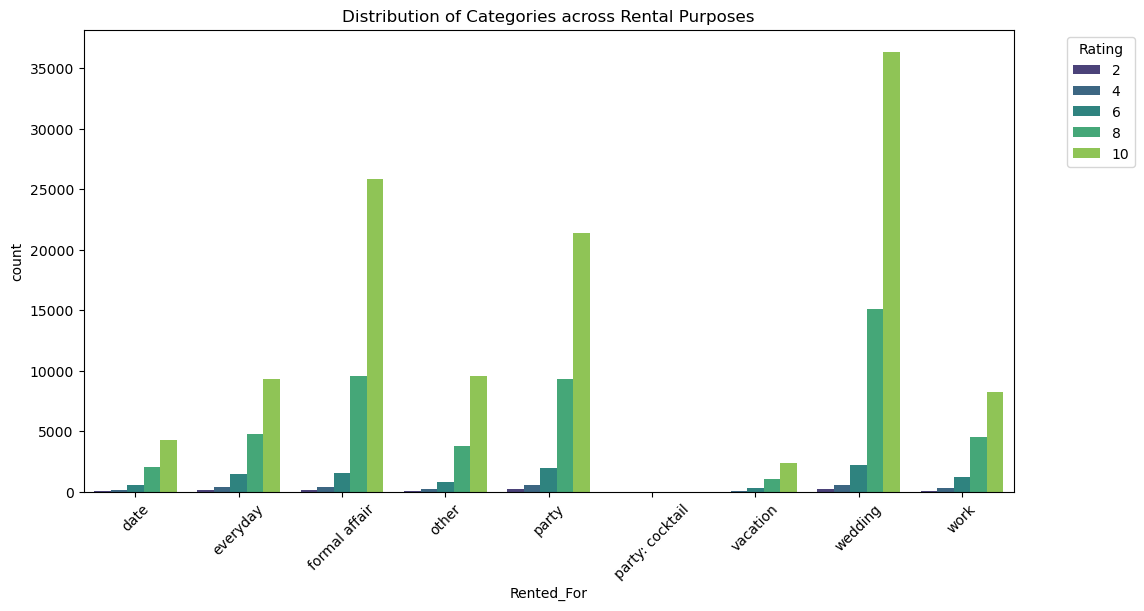

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Rented_For', hue='Rating', data=runway_df_cleaned, palette='viridis')
plt.title('Distribution of Categories across Rental Purposes')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


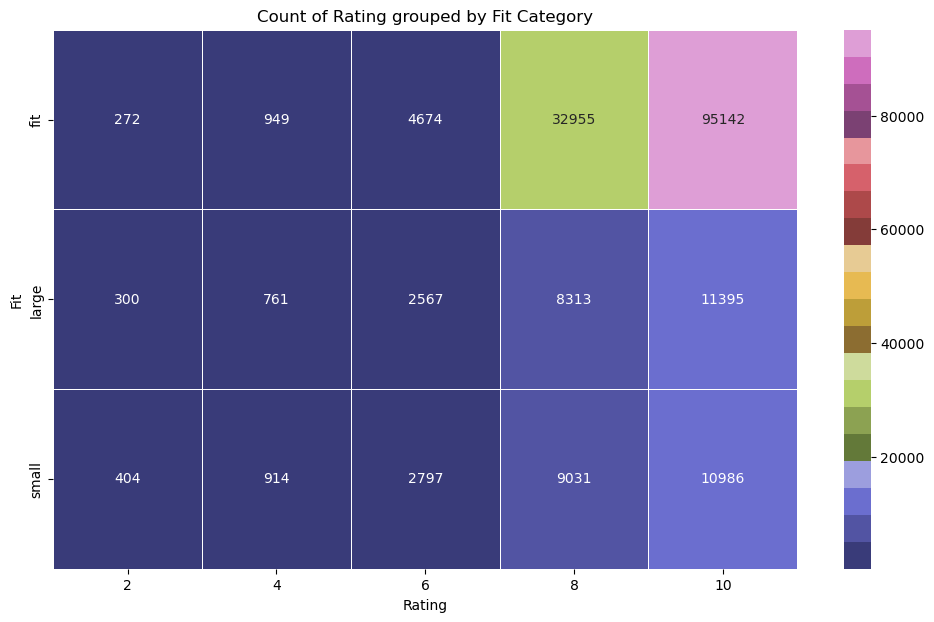

In [52]:
# pivot table to get counts of each Passholder_Type for each Trip_Route_Category
pivot_runway_df_cleaned = runway_df_cleaned.pivot_table(index='Fit', columns='Rating', aggfunc='size', fill_value=0)

# to plot Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_runway_df_cleaned, annot=True, fmt='d', cmap='tab20b', linewidths=.5)
plt.title('Count of Rating grouped by Fit Category')
plt.xlabel('Rating')
plt.ylabel('Fit')
plt.show()

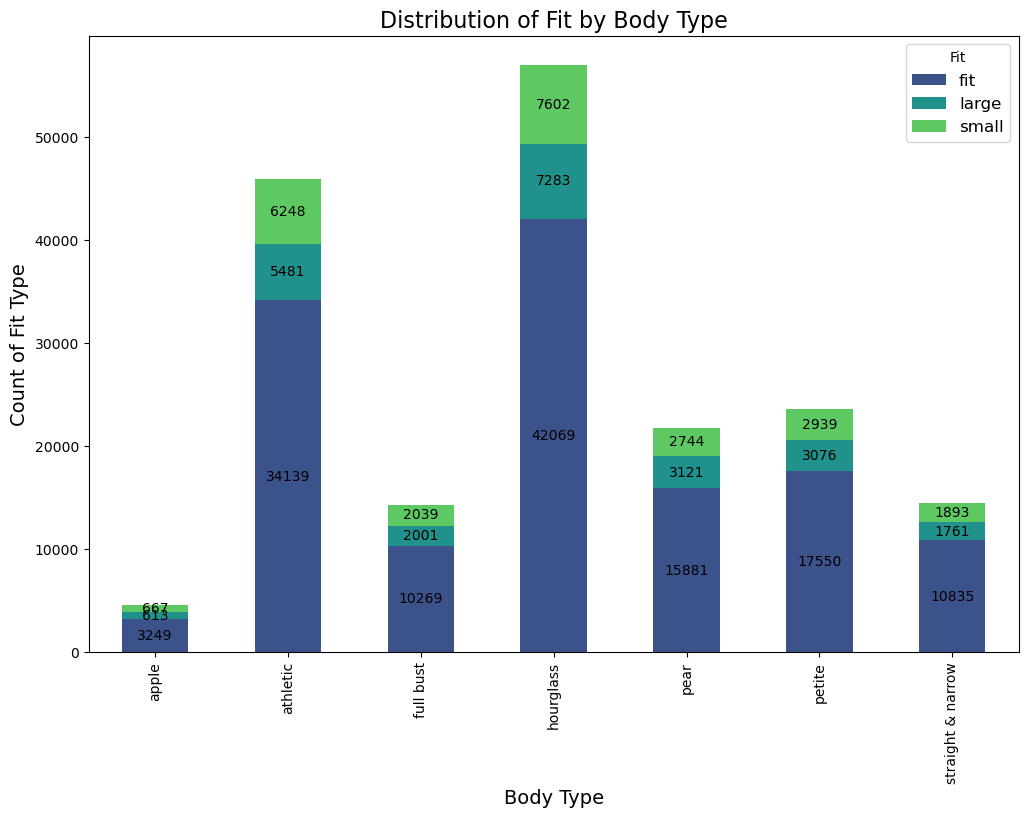

In [53]:
# Group the data by 'Body_Type' and count the occurrences of each 'Fit' category within each 'Body_Type'.
aggregated_data = runway_df_cleaned.groupby(['Body_Type', 'Fit']).size().unstack()

ylGnBu_colors = sns.color_palette('viridis', n_colors=aggregated_data.shape[1])

# plotting using stacked bar chart with the ylGnBu color palette
ax = aggregated_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=ylGnBu_colors)

# Adding labels and title with larger font size for better readability
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Count of Fit Type', fontsize=14)
plt.title('Distribution of Fit by Body Type', fontsize=16)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # To avoid cluttering the plot with zero values
        ax.text(x + width/2, 
                y + height/2, 
                int(height), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.legend(title='Fit', fontsize=12, loc='upper right')

plt.show()


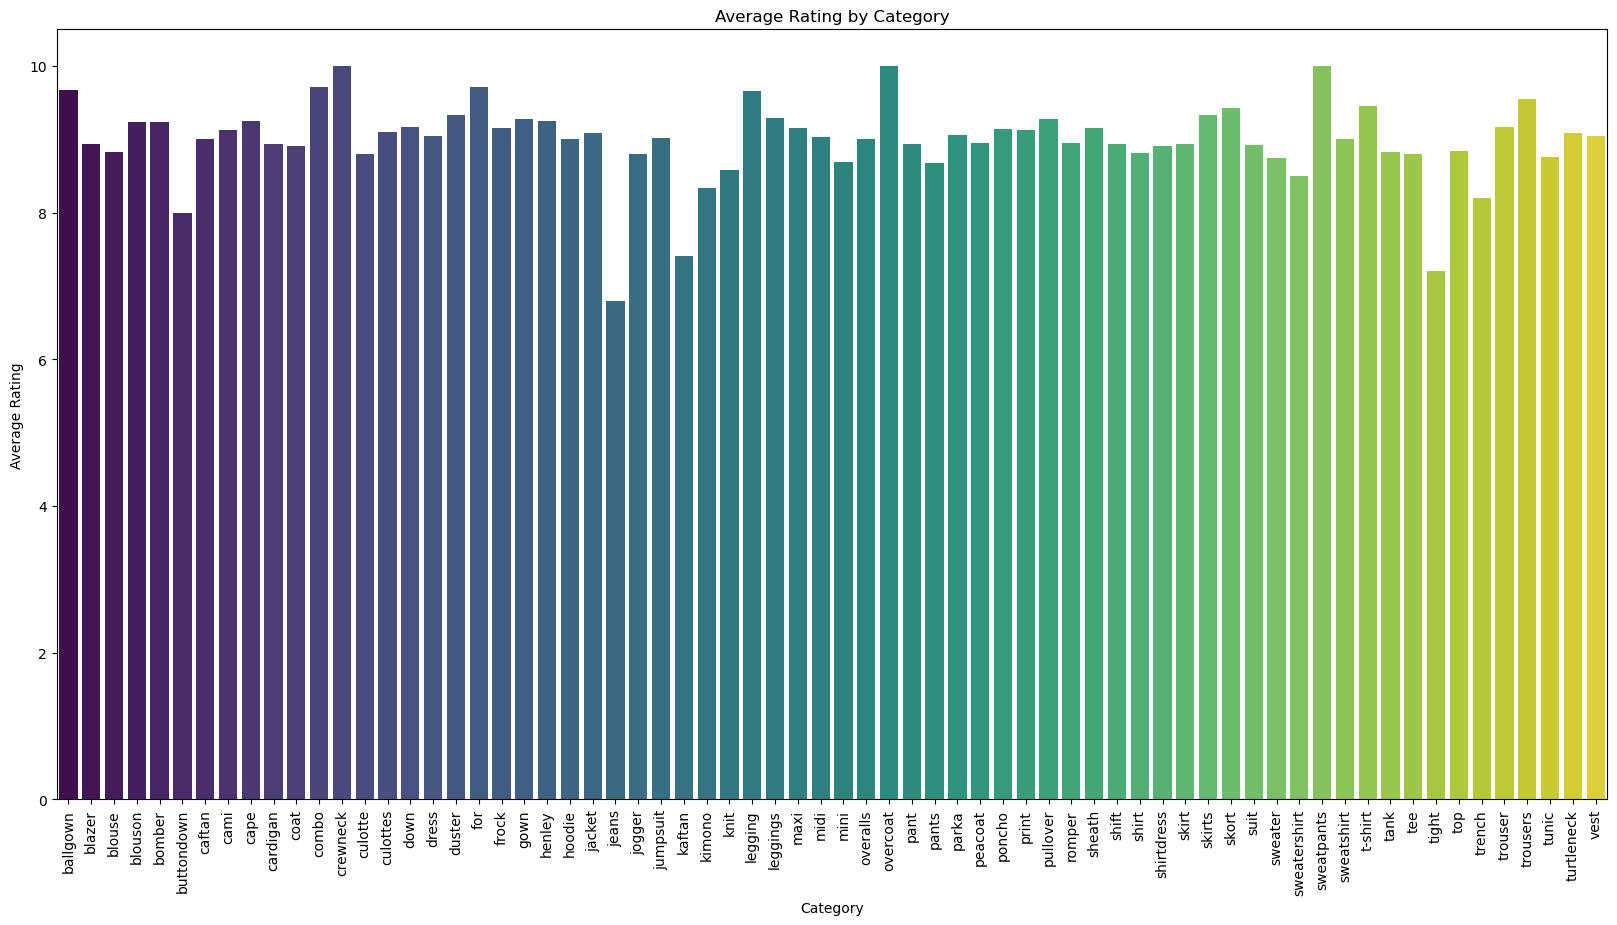

In [54]:
# average rating per category
category_rating_avg = runway_df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))  
sns.barplot(
    x='Category',
    y='Rating',
    data=category_rating_avg.reset_index(),
    palette="viridis"
)
plt.xticks(rotation=90)  
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()


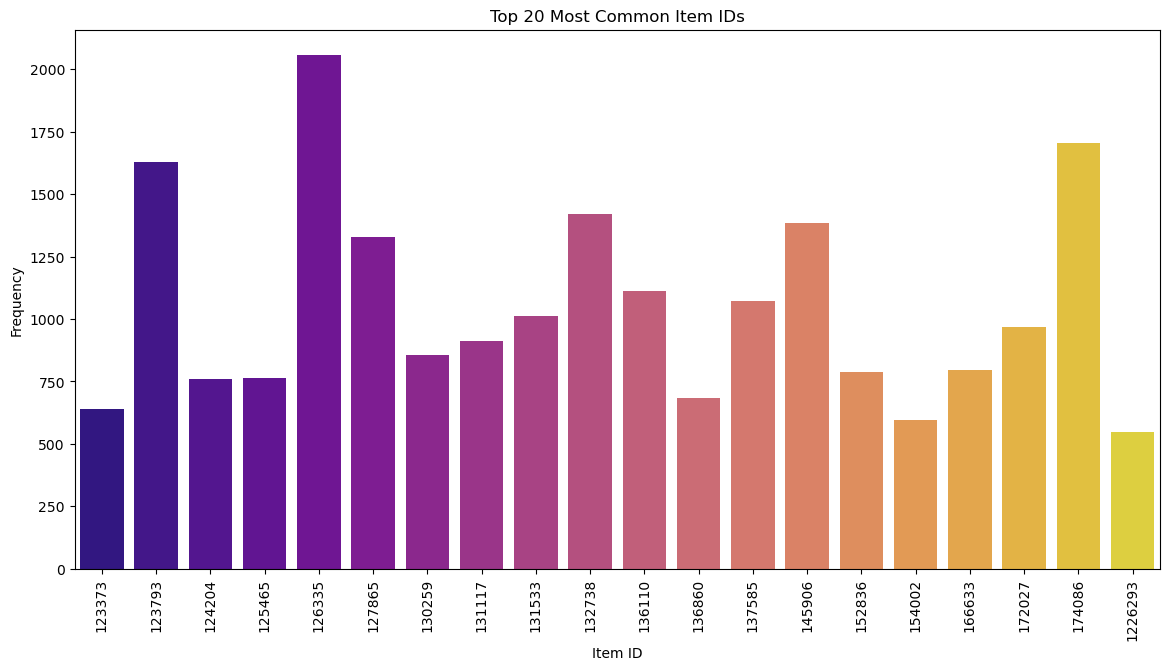

In [55]:
# counts of each Item_Id
item_counts = runway_df_cleaned['Item_Id'].value_counts().head(20)  # Top 20 items

# bar chart for the top N items
plt.figure(figsize=(14, 7))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Item ID')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Item IDs')
plt.show()


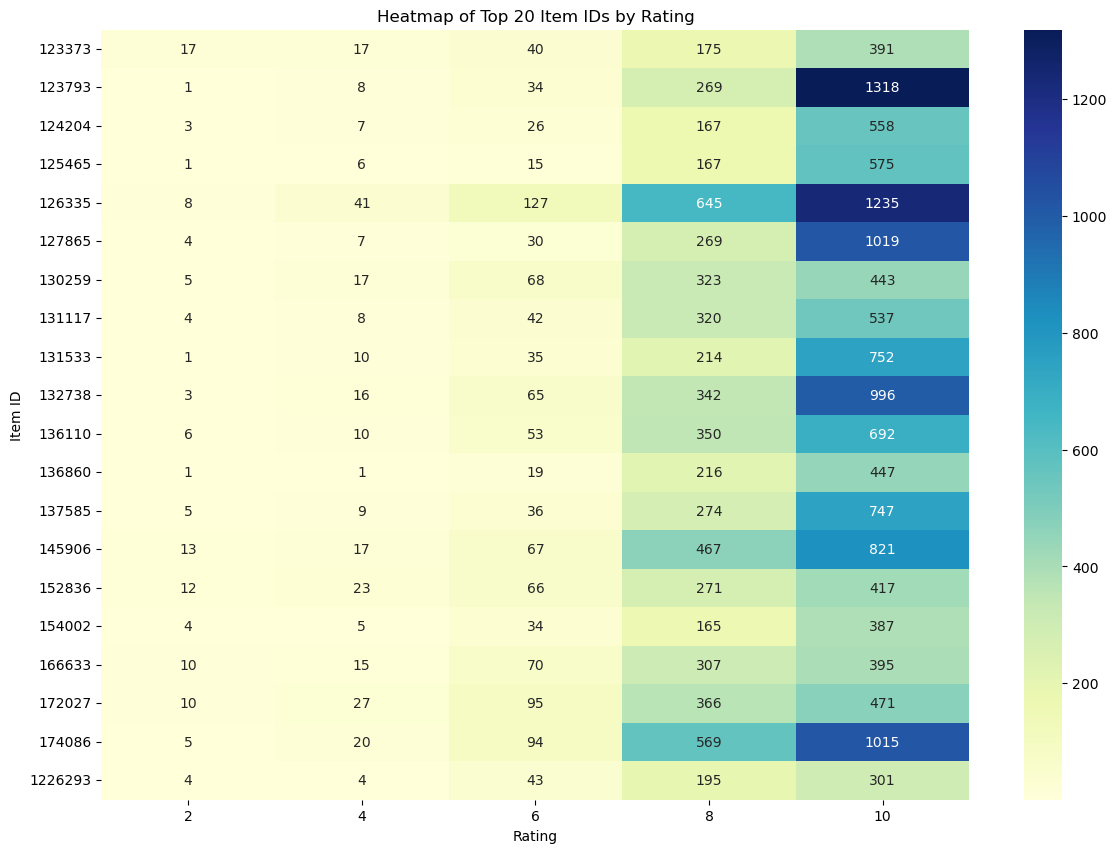

In [56]:

#  top 20 most common 'Item_Id' values
top_item_ids = item_counts.index

# to Filter the original DataFrame to only include rows with the top 'Item_Id' values
top_items_df = runway_df_cleaned[runway_df_cleaned['Item_Id'].isin(top_item_ids)]

# group by 'Item_Id' and 'Rating' and count occurrences
item_rating_matrix = top_items_df.groupby(['Item_Id', 'Rating']).size().unstack(fill_value=0)

#to create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(item_rating_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Rating')
plt.ylabel('Item ID')
plt.title('Heatmap of Top 20 Item IDs by Rating')
plt.show()

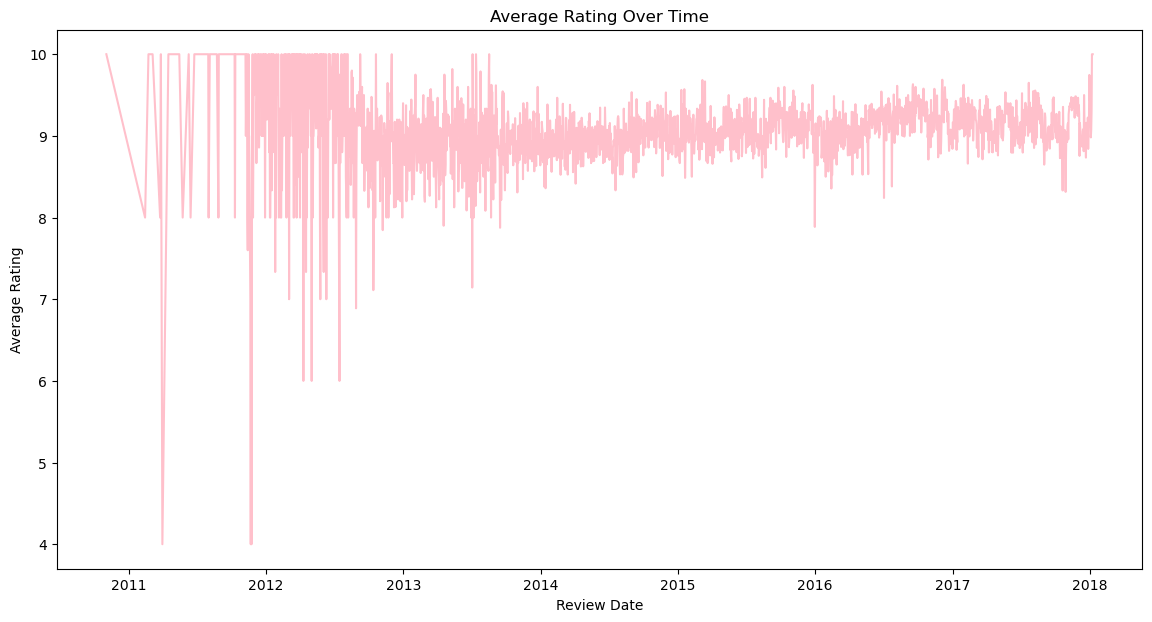

In [57]:
# Group by 'Review_Date' and calculate the average 'Rating'
date_rating_avg = runway_df_cleaned.groupby('Review_Date')['Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=date_rating_avg, x='Review_Date', y='Rating', color='pink')

plt.title('Average Rating Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Rating')
plt.show()


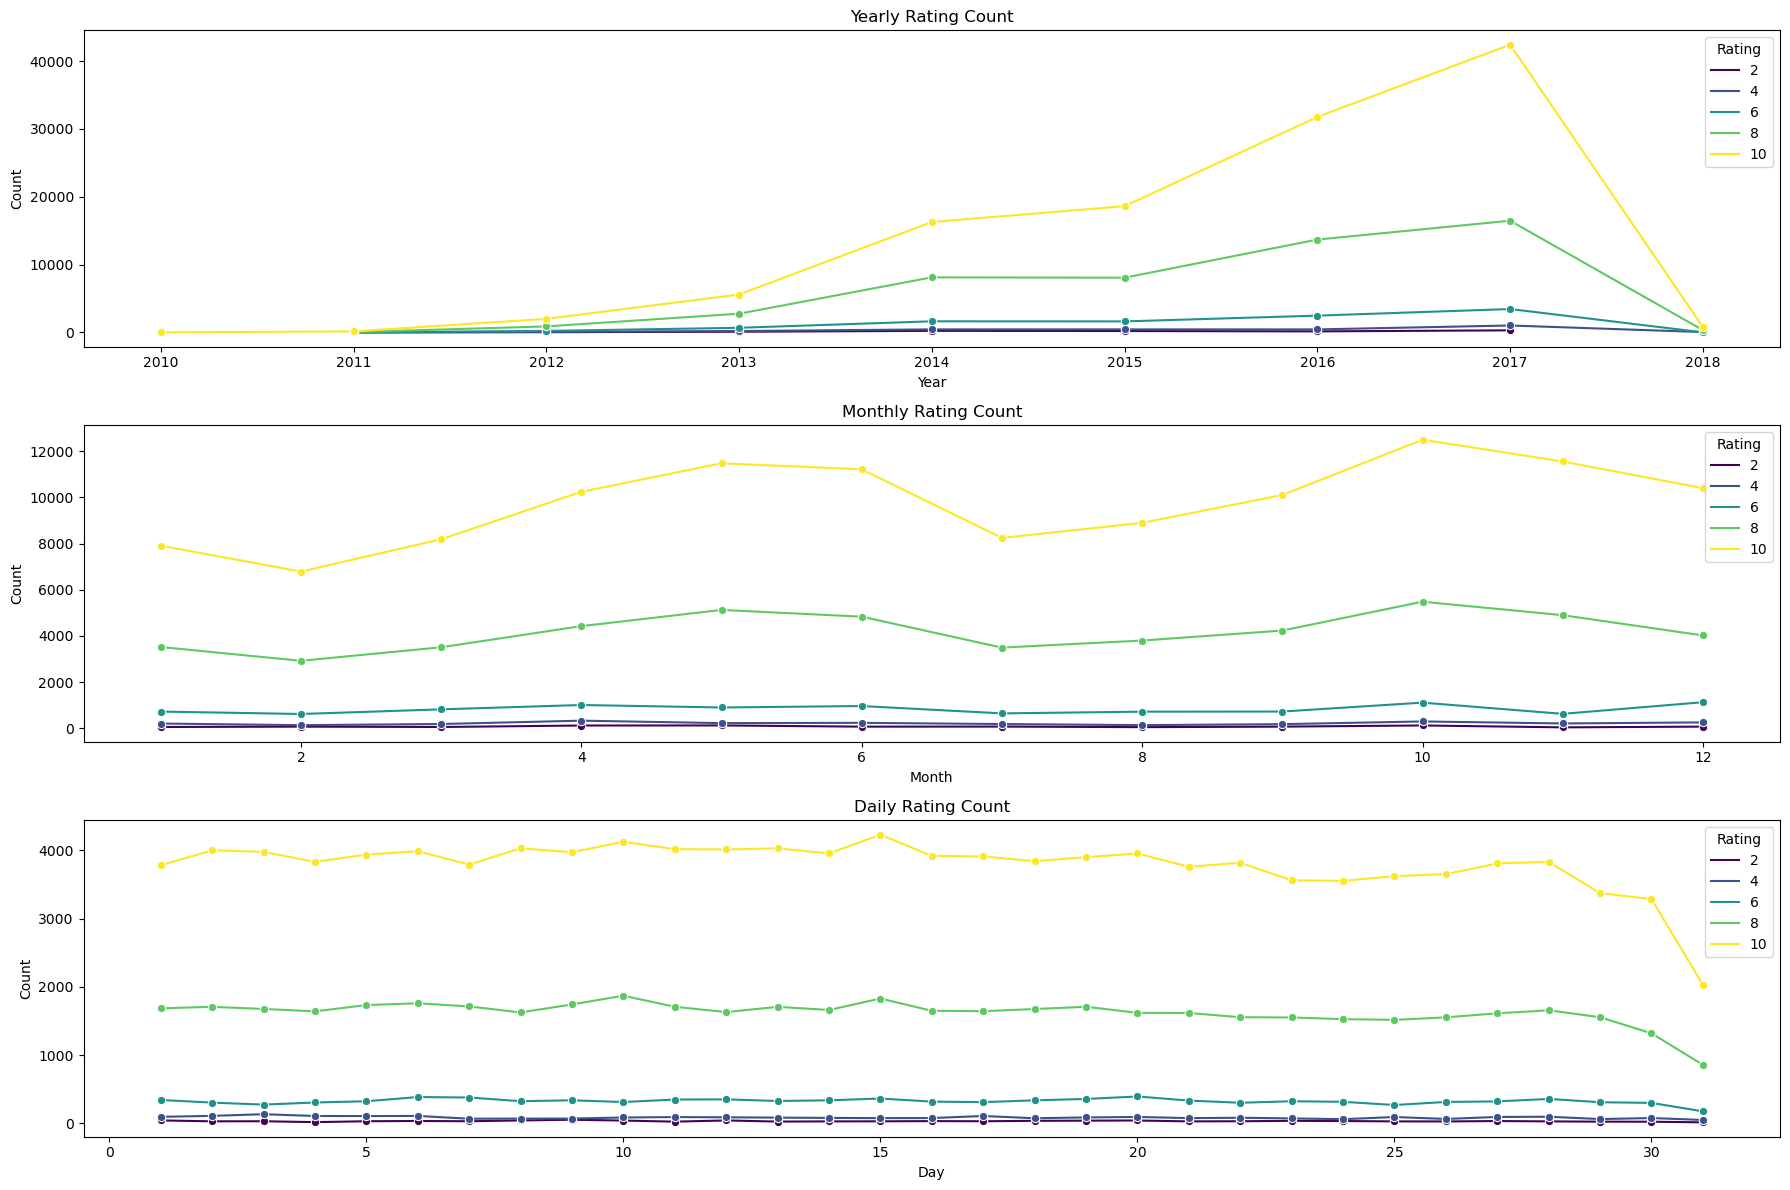

In [59]:
# Extract year, month, and day from Review_Date
runway_df_cleaned['Year'] = runway_df_cleaned['Review_Date'].dt.year
runway_df_cleaned['Month'] = runway_df_cleaned['Review_Date'].dt.month
runway_df_cleaned['Day'] = runway_df_cleaned['Review_Date'].dt.day

# Group by Year, Month, Day, and Rating to get counts
yearly_rating_count = runway_df_cleaned.groupby(['Year', 'Rating']).size().reset_index(name='Count')
monthly_rating_count = runway_df_cleaned.groupby(['Month', 'Rating']).size().reset_index(name='Count')
daily_rating_count = runway_df_cleaned.groupby(['Day', 'Rating']).size().reset_index(name='Count')

# line plots for counts
plt.figure(figsize=(18, 12))

# Yearly rating count
plt.subplot(3, 1, 1)
sns.lineplot(data=yearly_rating_count, x='Year', y='Count', hue='Rating', palette='viridis', marker='o')
plt.title('Yearly Rating Count')
plt.legend(title='Rating')

# Monthly rating count
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_rating_count, x='Month', y='Count', hue='Rating', palette='viridis', marker='o')
plt.title('Monthly Rating Count')
plt.legend(title='Rating')

# Daily rating count
plt.subplot(3, 1, 3)
sns.lineplot(data=daily_rating_count, x='Day', y='Count', hue='Rating', palette='viridis', marker='o')
plt.title('Daily Rating Count')
plt.legend(title='Rating')

plt.tight_layout()
plt.show()


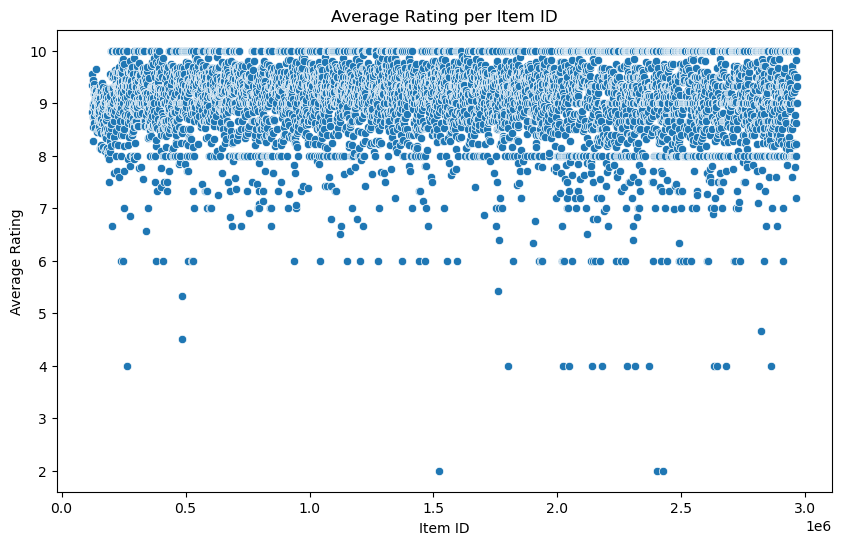

In [60]:
#scatter plot to visualize spread of Rating
item_avg_rating = runway_df_cleaned.groupby('Item_Id')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Id', y='Rating', data=item_avg_rating)
plt.title('Average Rating per Item ID')
plt.xlabel('Item ID')
plt.ylabel('Average Rating')
plt.show()


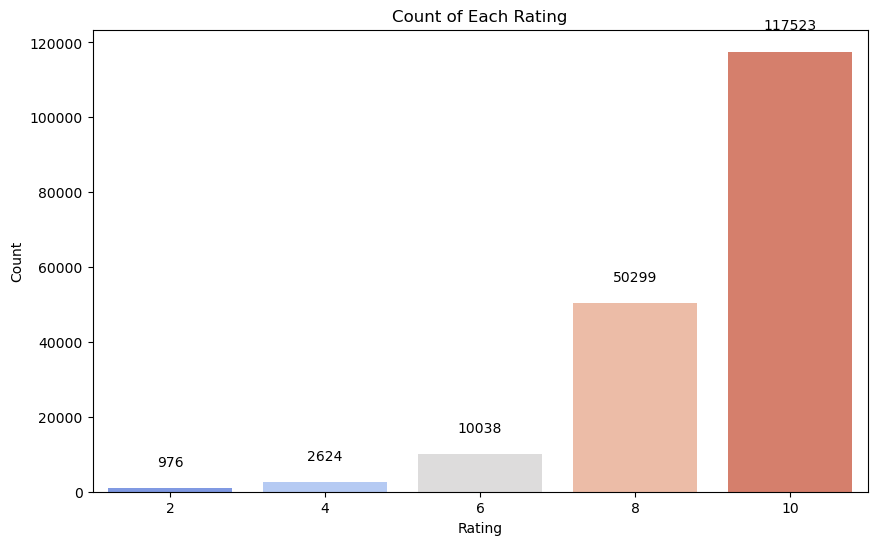

In [61]:
# Bar chart to get counts grouped by each Rating
rating_counts = runway_df_cleaned['Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Count of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
for i, count in enumerate(rating_counts.values):
    plt.text(i, count + 0.05 * max(rating_counts.values), str(count), ha='center')
plt.show()


In [62]:
pd.set_option('display.max_colwidth', None) 
#view sample records of Review fields
review_text_df = runway_df_cleaned[['Review_Text','Review_Summary']].head(10)
review_text_df

Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.    
3                                                                                                                                                                                                                                                      I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!   
4                                                                                                                                                      I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.    
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Didn't actually wear it. It fit perfectly. The fabric is a little thicker, so higher quality. Felt a bit too conservative for my taste. I rented it for the color and loved the berry shade of red.   
6                                                                                                                                                                                                                                                                                                                                                                                                                    

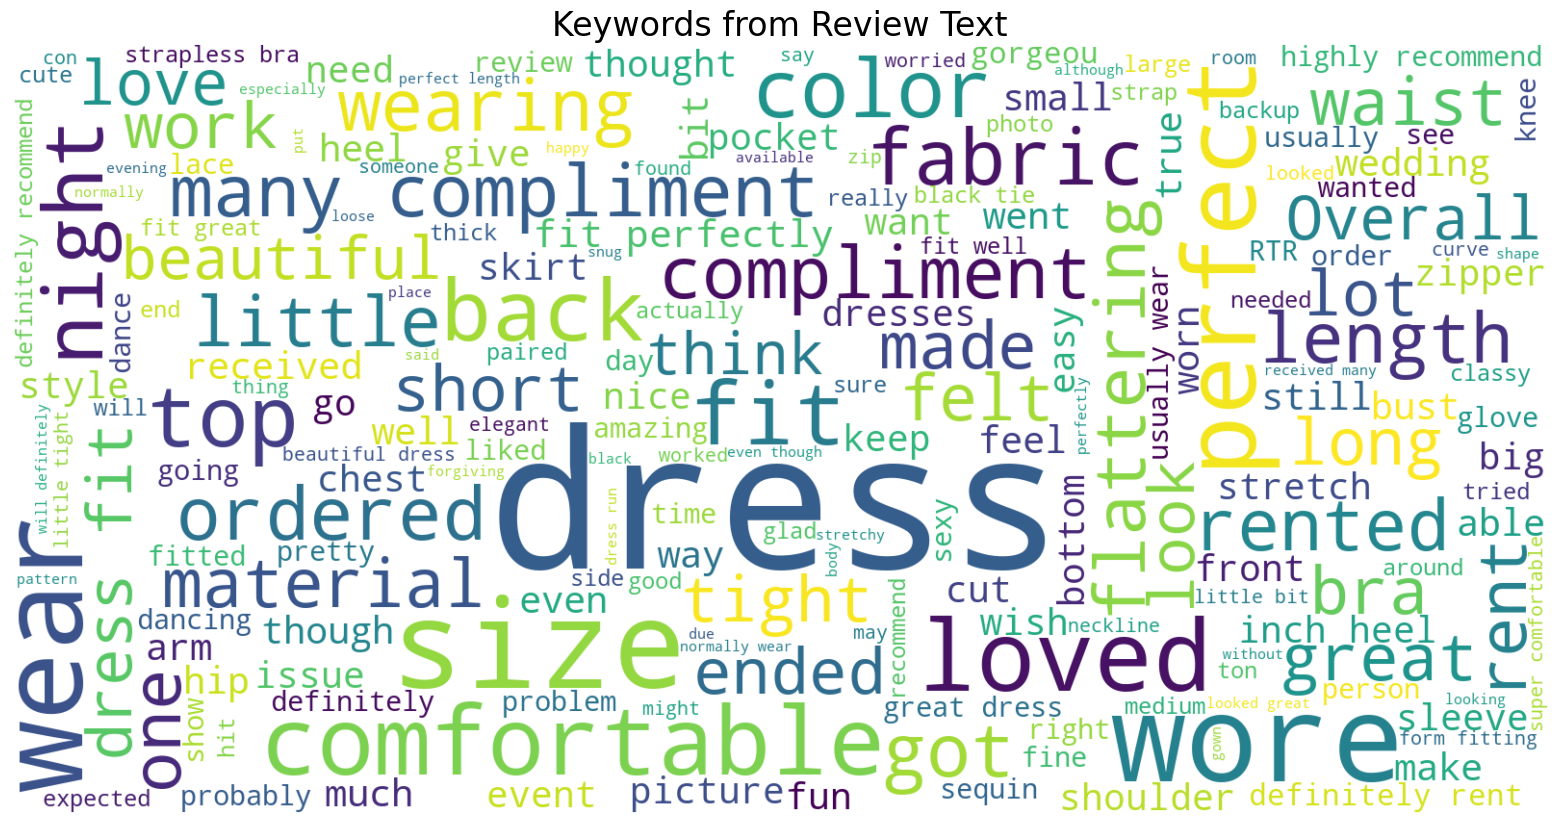

In [64]:
# Join all reviews in the 'Review_Text' column into a single string
text = ' '.join(review for review in runway_df_cleaned['Review_Text'])

# Generate a word cloud image with higher resolution
wordcloud = WordCloud(
    background_color='white',
    width=1600,  
    height=800,  
    max_font_size=200,  
).generate(text)

# Display the generated image
plt.figure(figsize=(20, 10)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#title to the word cloud plot
plt.title('Keywords from Review Text', fontsize=24)

plt.show()

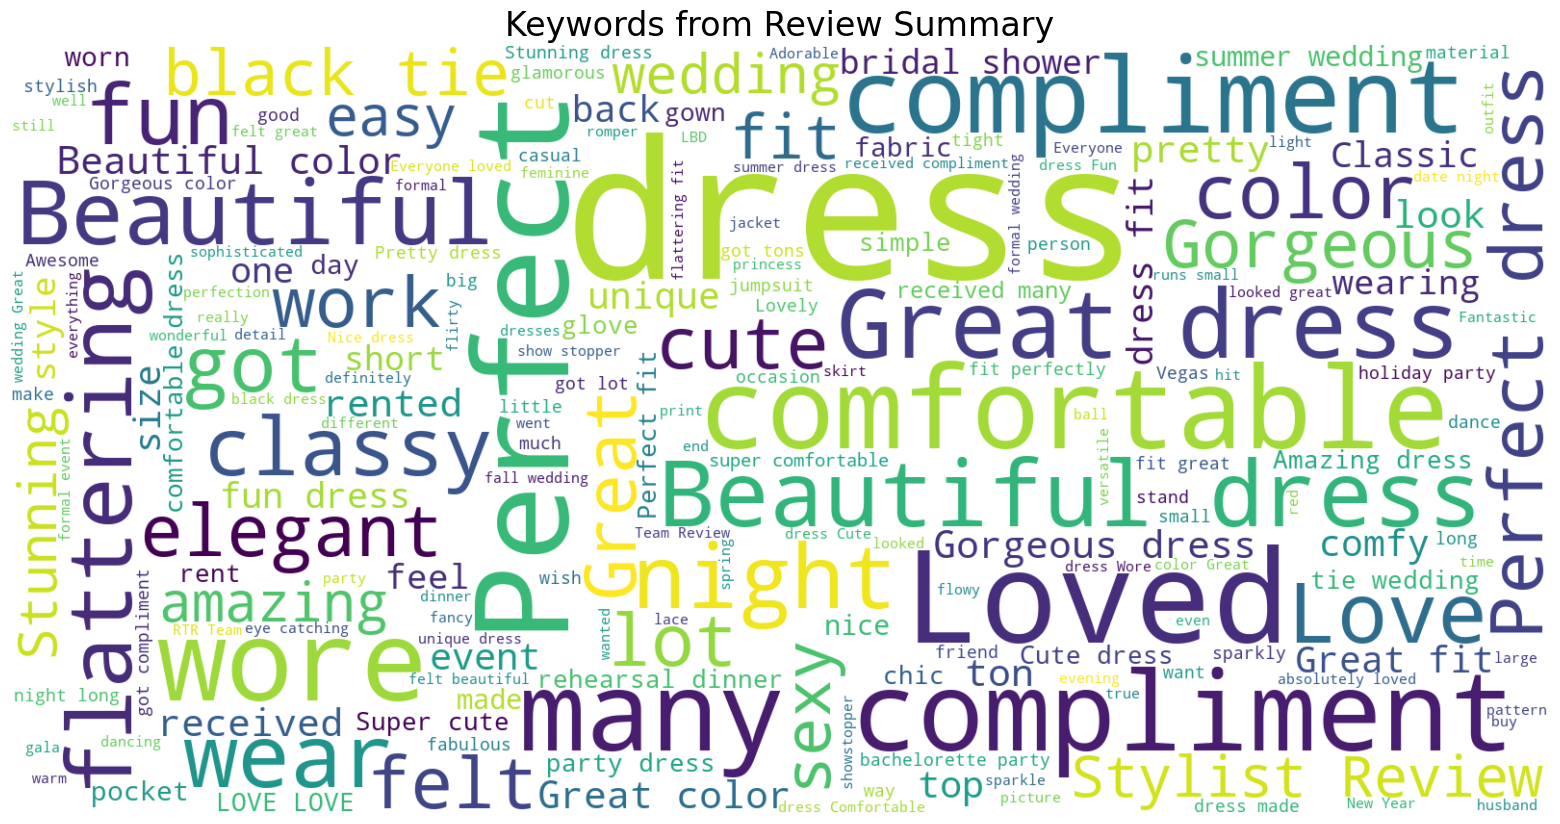

In [65]:
# Joining all reviews in the 'Review_Text' column into a single string
text = ' '.join(review for review in runway_df_cleaned['Review_Summary'])

# Generate a word cloud image with higher resolution
wordcloud = WordCloud(
    background_color='white',
    width=1600, 
    height=800, 
    max_font_size=200,  
).generate(text)

# to Display the generated image
plt.figure(figsize=(20, 10))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Adding a title to the word cloud plot
plt.title('Keywords from Review Summary', fontsize=24)

plt.show()

## Feature Selection

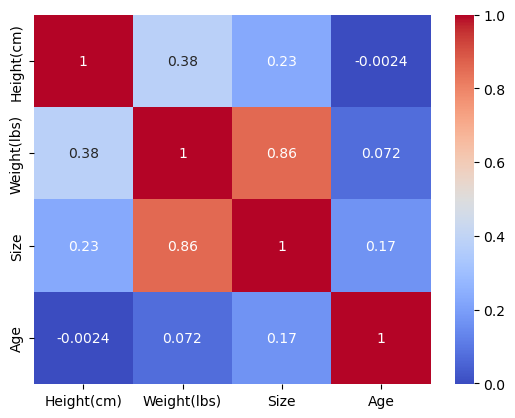

In [66]:
correlation_matrix = runway_df_cleaned[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [67]:
#creation of new feature
runway_df_cleaned['Days_Since_Review'] = (runway_df_cleaned['Review_Date'] - runway_df_cleaned['Review_Date'].min()).dt.days

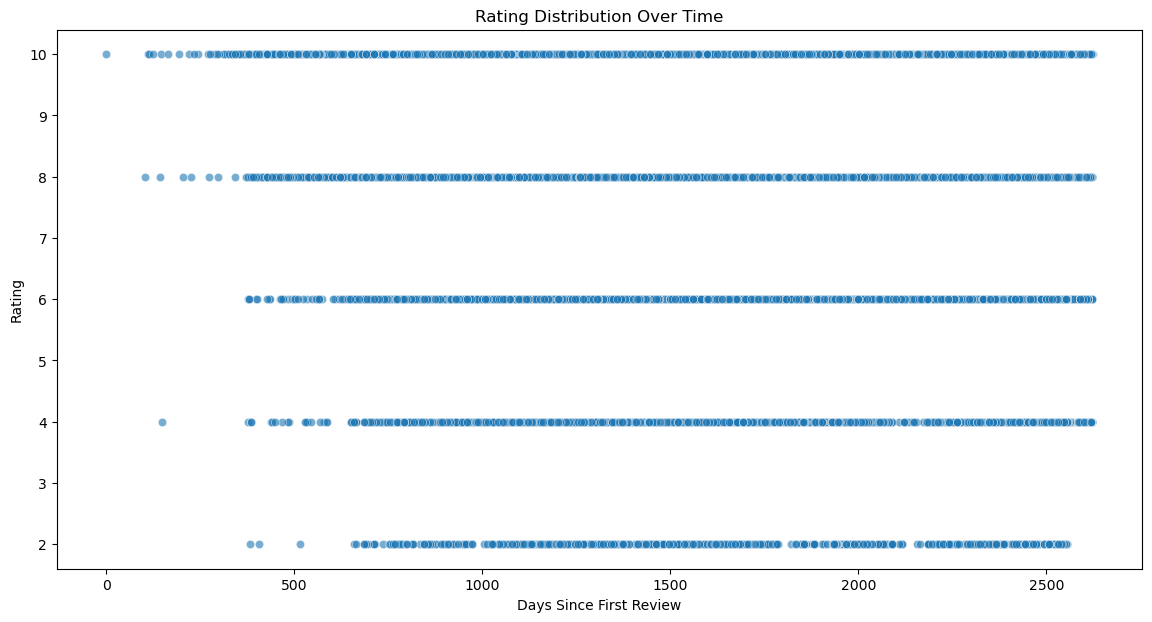

In [68]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Days_Since_Review', y='Rating', data=runway_df_cleaned, alpha=0.6)

plt.title('Rating Distribution Over Time')
plt.xlabel('Days Since First Review')
plt.ylabel('Rating')
plt.show()


In [69]:
#making a copy to add new fields for correlation matrix
original_df = runway_df_cleaned.copy()

In [70]:
runway_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181460 entries, 0 to 190641
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   User_Id            181460 non-null  int64         
 1   Item_Id            181460 non-null  int64         
 2   Bust_Size          181460 non-null  object        
 3   Height(cm)         181460 non-null  float64       
 4   Weight(lbs)        181460 non-null  Int64         
 5   Size               181460 non-null  int64         
 6   Body_Type          181460 non-null  category      
 7   Age                181460 non-null  float64       
 8   Fit                181460 non-null  category      
 9   Category           181460 non-null  category      
 10  Rented_For         181460 non-null  category      
 11  Review_Text        181460 non-null  object        
 12  Review_Summary     181460 non-null  object        
 13  Review_Date        181460 non-null  datetime

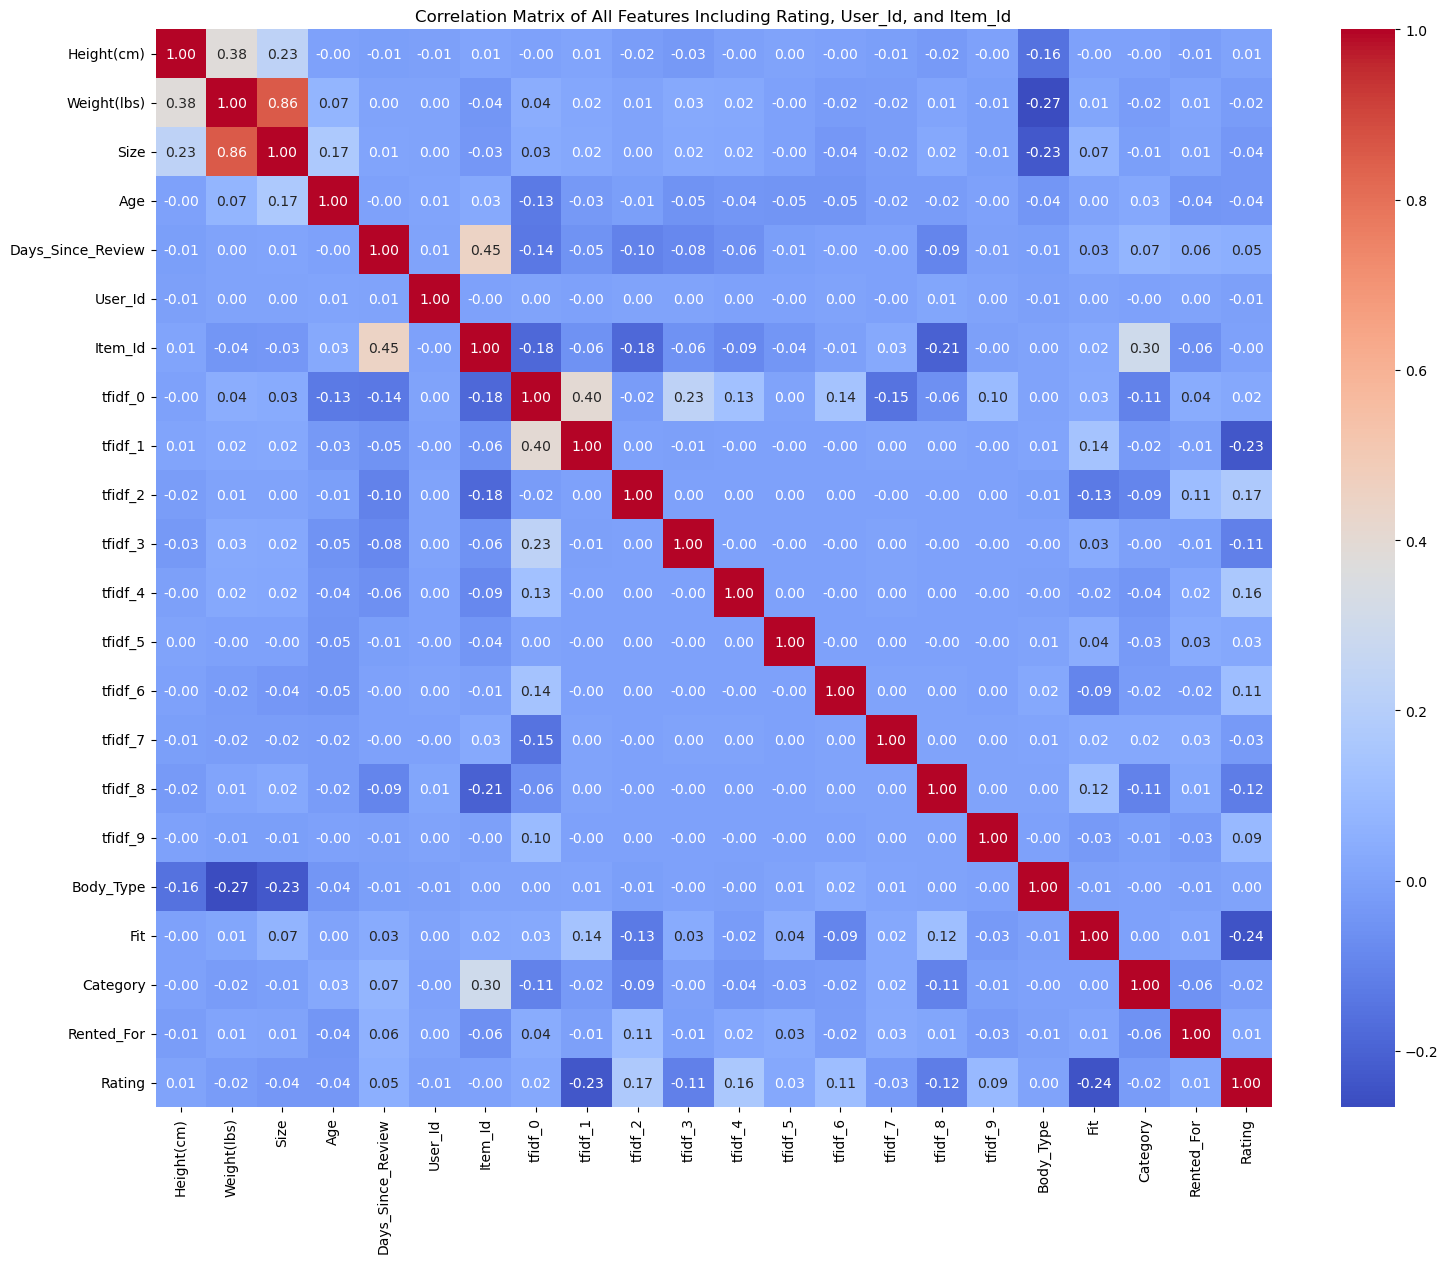

In [71]:
# Combining 'Review_Text' and 'Review_Summary' into a single text feature for TF-IDF
original_df['Combined_Text'] = original_df['Review_Text'] + " " + original_df['Review_Summary']

# Encoding categorical features and 'Rating'
for col in ['Body_Type', 'Fit', 'Category', 'Rented_For', 'Rating']:
    original_df[col] = LabelEncoder().fit_transform(original_df[col])

# Normalize numeric features
numeric_cols = ['Height(cm)', 'Weight(lbs)', 'Size', 'Age']
original_df[numeric_cols] = MinMaxScaler().fit_transform(original_df[numeric_cols])

# Convert 'Review_Date' to a numeric value
original_df['Review_Date'] = pd.to_datetime(original_df['Review_Date'])
original_df['Days_Since_Review'] = (original_df['Review_Date'] - original_df['Review_Date'].min()).dt.days
numeric_cols.append('Days_Since_Review')

# Encode 'User_Id' and 'Item_Id' as numeric features
original_df['User_Id'] = LabelEncoder().fit_transform(original_df['User_Id'])
original_df['Item_Id'] = LabelEncoder().fit_transform(original_df['Item_Id'])
numeric_cols += ['User_Id', 'Item_Id']

# Create TF-IDF features for 'Combined_Text'
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limiting to top 100 features for simplicity
tfidf_features = tfidf_vectorizer.fit_transform(original_df['Combined_Text'])

# Reduce dimensions of TF-IDF features
svd = TruncatedSVD(n_components=10)
tfidf_reduced = svd.fit_transform(tfidf_features)

# Add reduced TF-IDF features back to the DataFrame
for i in range(tfidf_reduced.shape[1]):
    original_df[f'tfidf_{i}'] = tfidf_reduced[:, i]

# Updating the list of processed features to include 'Rating', 'User_Id', 'Item_Id'
processed_features = numeric_cols + [f'tfidf_{i}' for i in range(tfidf_reduced.shape[1])] + ['Body_Type', 'Fit', 'Category', 'Rented_For', 'Rating']

# Computing correlation matrix for the processed DataFrame
correlation_matrix = original_df[processed_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features Including Rating, User_Id, and Item_Id')
plt.show()


In [72]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181460 entries, 0 to 190641
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   User_Id            181460 non-null  int64         
 1   Item_Id            181460 non-null  int64         
 2   Bust_Size          181460 non-null  object        
 3   Height(cm)         181460 non-null  float64       
 4   Weight(lbs)        181460 non-null  float64       
 5   Size               181460 non-null  float64       
 6   Body_Type          181460 non-null  int32         
 7   Age                181460 non-null  float64       
 8   Fit                181460 non-null  int32         
 9   Category           181460 non-null  int32         
 10  Rented_For         181460 non-null  int32         
 11  Review_Text        181460 non-null  object        
 12  Review_Summary     181460 non-null  object        
 13  Review_Date        181460 non-null  datetime

In [73]:
runway_df_cleaned.head()

User_Id  Item_Id Bust_Size  Height(cm)  Weight(lbs)  Size  \
0   420272  2260466       34d      172.72          137    14   
1   273551   153475       34b      167.64          132    12   
3   909926   126335       34c      165.10          135     8   
4   151944   616682       34b      175.26          145    12   
5   734848   364092       32b      172.72          138     8   

           Body_Type   Age  Fit Category     Rented_For  \
0          hourglass  28.0  fit   romper       vacation   
1  straight & narrow  36.0  fit     gown          other   
3               pear  34.0  fit    dress  formal affair   
4           athletic  27.0  fit     gown        wedding   
5           athletic  45.0  fit    dress           date   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                      An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.   
1                                                                                                                                                                                                                                                                                                                                                      I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.    
3                                                                                                  I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!   
4  I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.    
5                                                                                                                                                                                                                                                                                                                                                                                Didn't actually wear it. It fit perfectly. The fabric 

## Text Field Preprocessing

In [75]:
# simple processing of converting to lower case, removing links, removing special characters and stop words
nltk.download('punkt')
nltk.download('stopwords')

def normalize_text(text):
    """Lowercase and remove excessive whitespace."""
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def remove_html_tags(text):
    """Remove HTML tags using BeautifulSoup."""
    return BeautifulSoup(text, 'html.parser').get_text()

def remove_special_characters(text):
    """Remove special characters using regular expression."""
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def remove_stop_words(text):
    """Remove stop words """   
    stop_words_set = set(stopwords.words('english'))
       
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words_set or word.lower()]
    return ' '.join(filtered_tokens)

# Apply preprocessing
runway_df_cleaned['Processed_Review_Text'] = runway_df_cleaned['Review_Text'].apply(lambda x: remove_special_characters(remove_stop_words(remove_html_tags(normalize_text(x)))))
runway_df_cleaned['Processed_Review_Summary'] = runway_df_cleaned['Review_Summary'].apply(lambda x: remove_special_characters(remove_stop_words(remove_html_tags(normalize_text(x)))))

# Display before and after comparison for the first 10 records
comparison_df = runway_df_cleaned[['Review_Text', 'Processed_Review_Text', 'Review_Summary', 'Processed_Review_Summary']].head(20)
pd.set_option('display.max_colwidth', None) 
(comparison_df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mailv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mailv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.    
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!   
4                                                                                                                                                                                                                                                                                                                                                                                                                                      I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.    
5                                

In [76]:
# Filter the dataset for reviews with a rating of 2
selected_data = runway_df_cleaned[runway_df_cleaned['Rating'] == 2].copy()
# Display before and after comparison for the first 10 records
comparison_df_1 = selected_data[['Review_Text', 'Processed_Review_Text', 'Review_Summary', 'Processed_Review_Summary']].head(20)
pd.set_option('display.max_colwidth', None) 
(comparison_df_1)

Review_Text  \
150                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        The dress was much shorter than it appeared, too short for a wedding, so I wasn't able to wear it.  Other reviews about the lace being a little tight on the shoulders is spot-on, but it would have been fine if the dress had been a little longer.  Bummer, too, because it is such a pretty dress.    
179                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          So I didn't get a backup of this dress because it looked online like I would be charged extra for the backup. This was small enough that I couldn't zip it up and it was unwearable.    
475                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        It was way too big and had an odd fit.    
818                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         The dress is beautiful, but the sizes are weird...I tried on the 8 and my back was showing in a very unflattering way, then the 10 is okay in the back but the tummy area is too big.    
1359                                                                                                                                                                                                                                                     

In [78]:
# specification of important words to be not removed as part of stop words 
def expand_contractions(text):
    # Dictionary of English contractions and their expanded forms
    contractions_dict = {
        "can't": "cannot",
        "won't": "will not",
        "i'm": "i am",
        "you're": "you are",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "they're": "they are",
        "that's": "that is",
        "what's": "what is",
        "there's": "there is",
        "here's": "here is",
        "who's": "who is",
        "i've": "i have",
        "you've": "you have",
        "we've": "we have",
        "they've": "they have",
        "i'd": "i would",
        "you'd": "you would",
        "he'd": "he would",
        "she'd": "she would",
        "we'd": "we would",
        "they'd": "they would",
        "i'll": "i will",
        "you'll": "you will",
        "he'll": "he will",
        "she'll": "she will",
        "we'll": "we will",
        "they'll": "they will",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "haven't": "have not",
        "hasn't": "has not",
        "hadn't": "had not",
        "doesn't": "does not",
        "don't": "do not",
        "didn't": "did not",
        "won't": "will not",
        "wouldn't": "would not",
        "shouldn't": "should not",
        "can't": "cannot",
        "couldn't": "could not",
        "mightn't": "might not",
        "mustn't": "must not"
    }

    # Regular expression for finding contractions
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)


def remove_stop_words(text, additional_negations=None):
    """Remove stop words except for specified negations."""
    if additional_negations is None:
        additional_negations = ['uncomfortable', 'tight', 'loose', 'short', 'long', 'big', 'small', 'itchy', 'heavy']
    stop_words_set = set(stopwords.words('english'))
    negations = {'not', 'no', "n't", 'never', 'neither', 'nor', 'hardly', 'scarcely', 'barely', 'but', "didn't", "couldn't", "wasn't", "isn't", "aren't", "don't"} | set(additional_negations)
    custom_stop_words = stop_words_set - negations
    
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in custom_stop_words or word.lower() in negations]
    return ' '.join(filtered_tokens)

# Apply preprocessing
runway_df_cleaned['Processed_Review_Text'] = runway_df_cleaned['Review_Text'].apply(lambda x: remove_special_characters(remove_stop_words(expand_contractions(remove_html_tags(normalize_text(x))))))
runway_df_cleaned['Processed_Review_Summary'] = runway_df_cleaned['Review_Summary'].apply(lambda x: remove_special_characters(remove_stop_words(expand_contractions(remove_html_tags(normalize_text(x))))))

# Display before and after comparison for the first 10 records
comparison_df_2 = runway_df_cleaned[['Review_Text', 'Processed_Review_Text', 'Review_Summary', 'Processed_Review_Summary']].head(10)
pd.set_option('display.max_colwidth', None) 
(comparison_df_2)

Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.    
3                                                                                                                                                                                                                                                      I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!   
4                                                                                                                                                      I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.    
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Didn't actually wear it. It fit perfectly. The fabric is a little thicker, so higher quality. Felt a bit too conservative for my taste. I rented it for the color and loved the berry shade of red.   
6                                                                                                                                                                                                                                                                                                                                                                                                                    

In [79]:
# Filter the dataset for reviews with a rating of 2
selected_data = runway_df_cleaned[runway_df_cleaned['Rating'] == 2].copy()
# Display before and after comparison for the first 10 records
comparison_df_3 = selected_data[['Review_Text', 'Processed_Review_Text', 'Review_Summary', 'Processed_Review_Summary']].head(20)
pd.set_option('display.max_colwidth', None) 
(comparison_df_3)

Review_Text  \
150                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        The dress was much shorter than it appeared, too short for a wedding, so I wasn't able to wear it.  Other reviews about the lace being a little tight on the shoulders is spot-on, but it would have been fine if the dress had been a little longer.  Bummer, too, because it is such a pretty dress.    
179                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          So I didn't get a backup of this dress because it looked online like I would be charged extra for the backup. This was small enough that I couldn't zip it up and it was unwearable.    
475                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        It was way too big and had an odd fit.    
818                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         The dress is beautiful, but the sizes are weird...I tried on the 8 and my back was showing in a very unflattering way, then the 10 is okay in the back but the tummy area is too big.    
1359                                                                                                                                                                                                                                                     

In [81]:
#lemmatization

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Lemmatize the text using NLTK's WordNetLemmatizer."""
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def preprocess_text(text):
    """Apply all preprocessing steps including lemmatization."""
    text = normalize_text(text)
    text = remove_html_tags(text)
    text = expand_contractions(text)
    text = remove_stop_words(text)
    text = lemmatize_text(text)
    text = remove_special_characters(text)
    return text

# preprocessing with lemmatization
runway_df_cleaned['Processed_Review_Text_Lemmatize'] = runway_df_cleaned['Processed_Review_Text'].apply(preprocess_text)
runway_df_cleaned['Processed_Review_Summary_Lemmatize'] = runway_df_cleaned['Processed_Review_Summary'].apply(preprocess_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mailv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mailv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [82]:

# Display before and after comparison for the first 10 records
comparison_df_lem = runway_df_cleaned[['Review_Text', 'Processed_Review_Text', 'Processed_Review_Text_Lemmatize', 'Review_Summary', 'Processed_Review_Summary','Processed_Review_Summary_Lemmatize']].head(10)
pd.set_option('display.max_colwidth', None)
(comparison_df_lem)

Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.    
3                                                                                                                                                                                                                                                      I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!   
4                                                                                                                                                      I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.    
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Didn't actually wear it. It fit perfectly. The fabric is a little thicker, so higher quality. Felt a bit too conservative for my taste. I rented it for the color and loved the berry shade of red.   
6                                                                                                                                                                                                                                                                                                                                                                                                                    

In [83]:
# Filter the dataset for reviews with a rating of 2
selected_data = runway_df_cleaned[runway_df_cleaned['Rating'] == 2].copy()
# Display before and after comparison for the first 10 records
comparison_df_lem_1 = selected_data[['Review_Text', 'Processed_Review_Text', 'Processed_Review_Text_Lemmatize', 'Review_Summary', 'Processed_Review_Summary', 'Processed_Review_Summary_Lemmatize']].head(20)
pd.set_option('display.max_colwidth', None) 
(comparison_df_lem_1)

Review_Text  \
150                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        The dress was much shorter than it appeared, too short for a wedding, so I wasn't able to wear it.  Other reviews about the lace being a little tight on the shoulders is spot-on, but it would have been fine if the dress had been a little longer.  Bummer, too, because it is such a pretty dress.    
179                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          So I didn't get a backup of this dress because it looked online like I would be charged extra for the backup. This was small enough that I couldn't zip it up and it was unwearable.    
475                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        It was way too big and had an odd fit.    
818                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         The dress is beautiful, but the sizes are weird...I tried on the 8 and my back was showing in a very unflattering way, then the 10 is okay in the back but the tummy area is too big.    
1359                                                                                                                                                                                                                                                     

In [85]:
#stemming

nltk.download('punkt')

stemmer = PorterStemmer()

def stem_text(text):
    """Stem the text using NLTK's PorterStemmer."""
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def preprocess_text(text):
    """Apply all preprocessing steps including stemming."""
    text = normalize_text(text)
    text = remove_html_tags(text)
    text = expand_contractions(text)
    text = remove_stop_words(text)
    text = stem_text(text)
    text = remove_special_characters(text)
    return text

# preprocessing with stemming
runway_df_cleaned['Processed_Review_Text_Stem'] = runway_df_cleaned['Processed_Review_Text'].apply(preprocess_text)
runway_df_cleaned['Processed_Review_Summary_Stem'] = runway_df_cleaned['Processed_Review_Summary'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mailv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:

# Display before and after comparison for the first 10 records
comparison_df_stem = runway_df_cleaned[['Review_Text', 'Processed_Review_Text', 'Processed_Review_Text_Stem', 'Review_Summary', 'Processed_Review_Summary','Processed_Review_Text_Stem']].head(10)
pd.set_option('display.max_colwidth', None) 
(comparison_df_stem)

Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.    
3                                                                                                                                                                                                                                                      I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!   
4                                                                                                                                                      I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.    
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Didn't actually wear it. It fit perfectly. The fabric is a little thicker, so higher quality. Felt a bit too conservative for my taste. I rented it for the color and loved the berry shade of red.   
6                                                                                                                                                                                                                                                                                                                                                                                                                    

In [87]:
# Filter the dataset for reviews with a rating of 2
selected_data = runway_df_cleaned[runway_df_cleaned['Rating'] == 2].copy()
# Display before and after comparison for the first 10 records
comparison_df_stem_1 = selected_data[['Review_Text', 'Processed_Review_Text', 'Processed_Review_Text_Stem', 'Review_Summary', 'Processed_Review_Summary', 'Processed_Review_Summary_Stem']].head(20)
pd.set_option('display.max_colwidth', None) 
(comparison_df_stem_1)

Review_Text  \
150                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        The dress was much shorter than it appeared, too short for a wedding, so I wasn't able to wear it.  Other reviews about the lace being a little tight on the shoulders is spot-on, but it would have been fine if the dress had been a little longer.  Bummer, too, because it is such a pretty dress.    
179                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          So I didn't get a backup of this dress because it looked online like I would be charged extra for the backup. This was small enough that I couldn't zip it up and it was unwearable.    
475                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        It was way too big and had an odd fit.    
818                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         The dress is beautiful, but the sizes are weird...I tried on the 8 and my back was showing in a very unflattering way, then the 10 is okay in the back but the tummy area is too big.    
1359                                                                                                                                                                                                                                                     

In [88]:
runway_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181460 entries, 0 to 190641
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   User_Id                             181460 non-null  int64         
 1   Item_Id                             181460 non-null  int64         
 2   Bust_Size                           181460 non-null  object        
 3   Height(cm)                          181460 non-null  float64       
 4   Weight(lbs)                         181460 non-null  Int64         
 5   Size                                181460 non-null  int64         
 6   Body_Type                           181460 non-null  category      
 7   Age                                 181460 non-null  float64       
 8   Fit                                 181460 non-null  category      
 9   Category                            181460 non-null  category      
 10  Rented_F

## Traditional Machine Learning models

In [89]:
# Additional libraries requried for Traditional Machine Learning Models

from sklearn.compose import ColumnTransformer  # For applying transformers to columns of arrays or pandas DataFrames
from sklearn.pipeline import make_pipeline, Pipeline  # Utilities for creating a pipeline of transforms with a final estimator
from sklearn.preprocessing import OneHotEncoder  # Encodes categorical integer features as a one-hot numeric array
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # For splitting datasets, hyperparameter tuning, and cross-validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance
from sklearn.linear_model import LogisticRegression  # Implements Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Implements ensemble classifiers like Random Forest and Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier  # Implements K-Nearest Neighbors classifier
from sklearn.naive_bayes import MultinomialNB  # Implements Multinomial Naive Bayes classifier
from lightgbm import LGBMClassifier  # Implements Light Gradient Boosting Machine classifier
from sklearn.utils.class_weight import compute_class_weight  # For computing class weights for imbalanced datasets



### Code Logic 1

Features selected From Correlation matrix and implemented using Logistic Regression, Naive Bayes and LGBM along with Hyper paramter tuning and Cross Validation for Evaluation

In [93]:
# Combining the text features
runway_df_cleaned['Combined_Reviews'] = runway_df_cleaned['Processed_Review_Text_Lemmatize'] + " " + runway_df_cleaned['Processed_Review_Summary_Lemmatize']

# Frequency encoding for 'Item_Id'
item_id_freq = runway_df_cleaned['Item_Id'].value_counts(normalize=True)  # Calculate frequency
runway_df_cleaned['Item_Id_Freq'] = runway_df_cleaned['Item_Id'].map(item_id_freq)  # Map frequency

# Updating features list to include 'Item_Id_Freq'
features = ['Combined_Reviews', 'Days_Since_Review', 'Height(cm)', 'Body_Type', 'Item_Id_Freq']

# Preparing input and target variables with updated features
X = runway_df_cleaned[features]
y = runway_df_cleaned['Rating']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Updating the preprocessor to not include 'Item_Id' in transformations since 'Item_Id_Freq' is already preprocessed
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Combined_Reviews'),
        ('num', MinMaxScaler(), ['Days_Since_Review', 'Height(cm)']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Body_Type'])
    ], remainder='passthrough')  # 'passthrough' for 'Item_Id_Freq' which doesn't need transformation


In [94]:

# Pipelines for each model
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier())
])

# Hyperparameter grids
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

nb_param_grid = {
    'classifier__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

lgbm_param_grid = {
    'classifier__num_leaves': [20, 31],  
    'classifier__learning_rate': [0.1],  
    'classifier__n_estimators': [50, 100]  
}


# Hyperparameter Tuning
def tune_model(pipeline, parameters, X, y):
    grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    return grid_search

# Tune each model
lr_best = tune_model(lr_pipeline, lr_param_grid, X_train, y_train)
nb_best = tune_model(nb_pipeline, nb_param_grid, X_train, y_train)
lgbm_best = tune_model(lgbm_pipeline, lgbm_param_grid, X_train, y_train)

# Print best parameters and scores
print("Best LR Parameters:", lr_best.best_params_, "Score:", lr_best.best_score_)
print("Best NB Parameters:", nb_best.best_params_, "Score:", nb_best.best_score_)
print("Best LGBM Parameters:", lgbm_best.best_params_, "Score:", lgbm_best.best_score_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.642742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343976
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4636
[LightGBM] [Info] Start training from score -5.231169
[LightGBM] [Info] Start training from score -4.240126
[LightGBM] [Info] Start training from score -2.895327
[LightGBM] [Info] Start training from score -1.282871
[LightGBM] [Info] Start training from score -0.434288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.715005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344365
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4623
[LightGBM] [Info] Start training from score -5.231169
[LightGBM] [Info] Start training from score -4.240724
[LightGBM] [Info] Start training f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.629518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343976
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4636
[LightGBM] [Info] Start training from score -5.231169
[LightGBM] [Info] Start training from score -4.240126
[LightGBM] [Info] Start training from score -2.895327
[LightGBM] [Info] Start training from score -1.282871
[LightGBM] [Info] Start training from score -0.434288
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.667273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344365
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4623
[LightGBM] [In

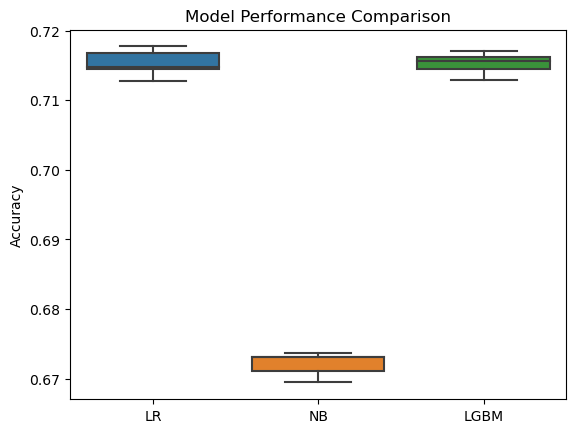

In [95]:

# Cross-validation scores
cv_results = {
    'LR': cross_val_score(lr_best.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'),
    'NB': cross_val_score(nb_best.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'),
    'LGBM': cross_val_score(lgbm_best.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
}

# Boxplot for CV results
cv_df = pd.DataFrame(cv_results)
sns.boxplot(data=cv_df)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


LR Model Evaluation:
------------------------------------------------------------
Accuracy: 0.7187

Classification Report:
              precision    recall  f1-score   support

           2       0.64      0.07      0.13       200
           4       0.37      0.12      0.18       533
           6       0.46      0.29      0.36      2012
           8       0.55      0.43      0.48     10052
          10       0.78      0.90      0.84     23495

    accuracy                           0.72     36292
   macro avg       0.56      0.36      0.40     36292
weighted avg       0.69      0.72      0.70     36292

LR Confusion Matrix:


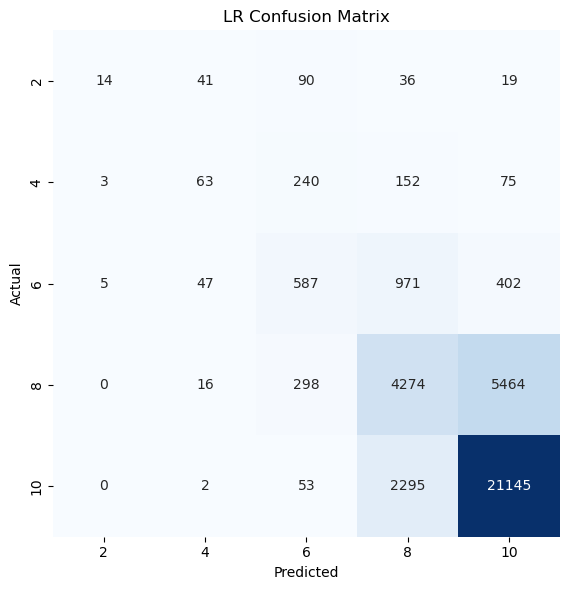

NB Model Evaluation:
------------------------------------------------------------
Accuracy: 0.6716

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       533
           6       0.46      0.02      0.05      2012
           8       0.49      0.15      0.23     10052
          10       0.69      0.97      0.81     23495

    accuracy                           0.67     36292
   macro avg       0.33      0.23      0.22     36292
weighted avg       0.61      0.67      0.59     36292

NB Confusion Matrix:


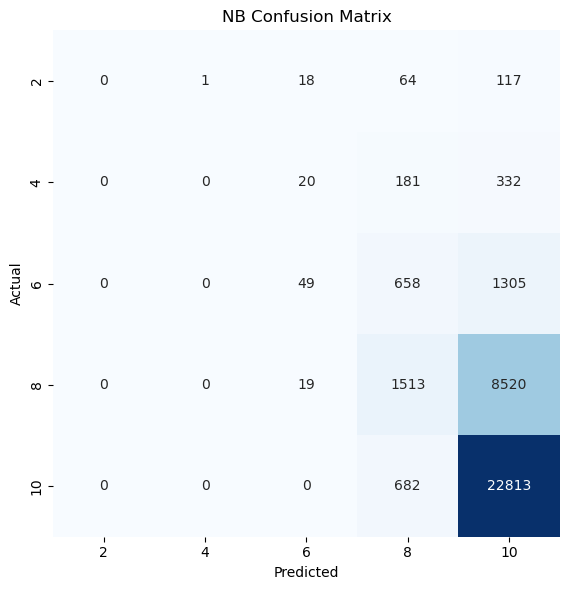

LGBM Model Evaluation:
------------------------------------------------------------
Accuracy: 0.7141

Classification Report:
              precision    recall  f1-score   support

           2       0.30      0.12      0.17       200
           4       0.34      0.11      0.17       533
           6       0.43      0.23      0.30      2012
           8       0.55      0.39      0.46     10052
          10       0.77      0.91      0.84     23495

    accuracy                           0.71     36292
   macro avg       0.48      0.35      0.39     36292
weighted avg       0.68      0.71      0.69     36292

LGBM Confusion Matrix:


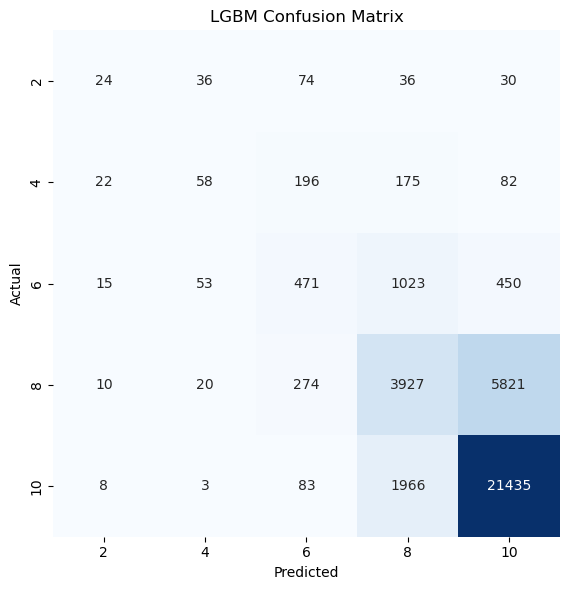

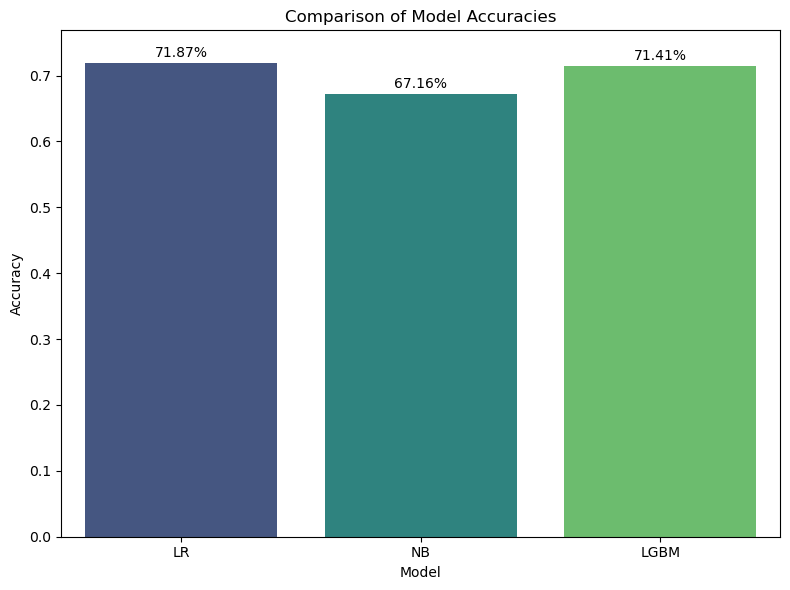

In [96]:
# Initializing a dictionary to hold the accuracy scores
accuracy_scores = {}

# Evaluating each model on the test set and generate reports
for name, model in [("LR", lr_best), ("NB", nb_best), ("LGBM", lgbm_best)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc  
    print(f"{name} Model Evaluation:")
    print("-" * 60)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['2', '4', '6', '8', '10']))
    print(f"{name} Confusion Matrix:")
    plt.figure(figsize=(6, 6))
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(ticks=np.arange(5) + 0.5, labels=['2', '4', '6', '8', '10'])
    plt.yticks(ticks=np.arange(5) + 0.5, labels=['2', '4', '6', '8', '10'])
    plt.tight_layout() 
    plt.show()


# Visualization of model accuracies with percentages on top
plt.figure(figsize=(8, 6))
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())
barplot = sns.barplot(x=model_names, y=accuracies, palette='viridis')

for i, value in enumerate(accuracies):
    barplot.text(i, value + 0.005, f"{value:.2%}", ha='center', va='bottom')

plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, max(accuracies) + 0.05) 
plt.tight_layout()
plt.show()


### Code Logic 2

Features selected From Correlation matrix and implemented using Logistic Regression, Naive Bayes and LGBM along with Hyper paramter tuning, Data Imbalance handling using class weights and Cross Validation for Evaluation 

In [98]:

# Frequency encoding for 'Item_Id'
item_id_freq = runway_df_cleaned['Item_Id'].value_counts(normalize=True)  # Calculate frequency
runway_df_cleaned['Item_Id_Freq'] = runway_df_cleaned['Item_Id'].map(item_id_freq)  # Map frequency

features = ['Combined_Reviews', 'Days_Since_Review', 'Height(cm)', 'Body_Type', 'Item_Id_Freq']

X = runway_df_cleaned[features]
y = runway_df_cleaned['Rating']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Update the preprocessor to not include 'Item_Id' in transformations since 'Item_Id_Freq' is already preprocessed
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Combined_Reviews'),
        ('num', MinMaxScaler(), ['Days_Since_Review', 'Height(cm)']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Body_Type'])
    ], remainder='passthrough')  # 'passthrough' for 'Item_Id_Freq' which doesn't need transformation


In [99]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Logistic Regression with class weights
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight=class_weight_dict))  # Applying class weights
])

# LGBMClassifier with class weights
lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(class_weight='balanced'))  # LGBM supports 'balanced' mode directly
])

nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])



In [100]:

# Hyperparameter grids
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

nb_param_grid = {
    'classifier__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

lgbm_param_grid = {
    'classifier__num_leaves': [20, 31, 50],  
    'classifier__learning_rate': [ 0.01, 0.1],  
    'classifier__n_estimators': [50, 100, 150]  
}


# Hyperparameter Tuning
def tune_model(pipeline, parameters, X, y):
    grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    return grid_search

# Tune each model
lr_best = tune_model(lr_pipeline, lr_param_grid, X_train, y_train)
nb_best = tune_model(nb_pipeline, nb_param_grid, X_train, y_train)
lgbm_best = tune_model(lgbm_pipeline, lgbm_param_grid, X_train, y_train)

#  best parameters and scores
print("Best LR Parameters:", lr_best.best_params_, "Score:", lr_best.best_score_)
print("Best NB Parameters:", nb_best.best_params_, "Score:", nb_best.best_score_)
print("Best LGBM Parameters:", lgbm_best.best_params_, "Score:", lgbm_best.best_score_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.647945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343976
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4636
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.619720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344365
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4623
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.740681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343976
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4636
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.745195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344365
[LightGBM] [Info] Number of data points in the train set: 116134, number of used features: 4623
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start 

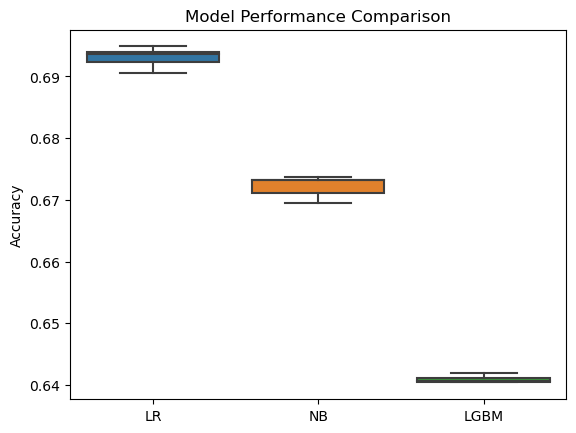

In [101]:

# Cross-validation scores
cv_results = {
    'LR': cross_val_score(lr_best.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'),
    'NB': cross_val_score(nb_best.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'),
    'LGBM': cross_val_score(lgbm_best.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
}

# Boxplot for CV results
cv_df = pd.DataFrame(cv_results)
sns.boxplot(data=cv_df)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


LR Model Evaluation:
------------------------------------------------------------
Accuracy: 0.6916

Classification Report:
              precision    recall  f1-score   support

           2       0.16      0.33      0.21       200
           4       0.19      0.34      0.24       533
           6       0.32      0.41      0.36      2012
           8       0.54      0.41      0.46     10052
          10       0.81      0.85      0.83     23495

    accuracy                           0.69     36292
   macro avg       0.40      0.47      0.42     36292
weighted avg       0.69      0.69      0.69     36292

LR Confusion Matrix:


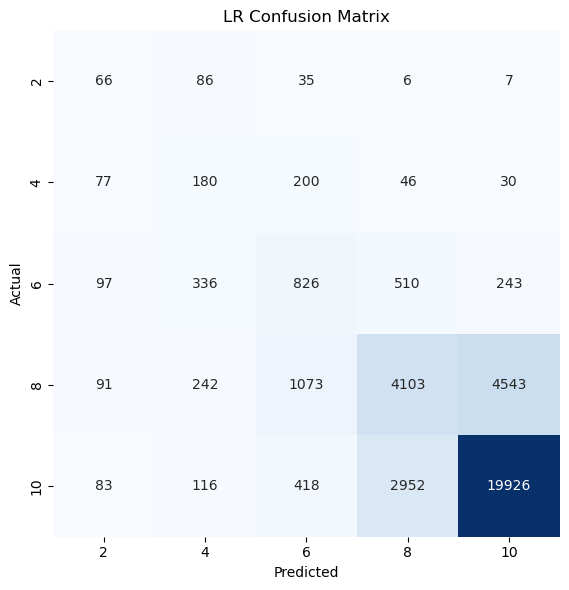

NB Model Evaluation:
------------------------------------------------------------
Accuracy: 0.6716

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       533
           6       0.46      0.02      0.05      2012
           8       0.49      0.15      0.23     10052
          10       0.69      0.97      0.81     23495

    accuracy                           0.67     36292
   macro avg       0.33      0.23      0.22     36292
weighted avg       0.61      0.67      0.59     36292

NB Confusion Matrix:


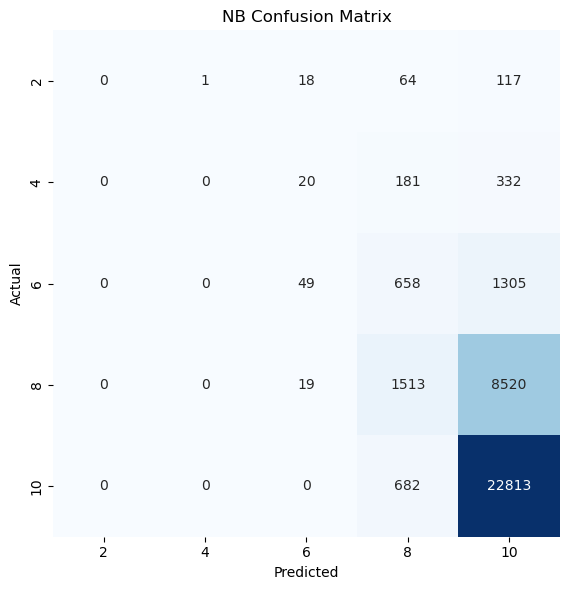

LGBM Model Evaluation:
------------------------------------------------------------
Accuracy: 0.6367

Classification Report:
              precision    recall  f1-score   support

           2       0.15      0.42      0.22       200
           4       0.17      0.40      0.24       533
           6       0.25      0.46      0.33      2012
           8       0.46      0.50      0.48     10052
          10       0.84      0.72      0.78     23495

    accuracy                           0.64     36292
   macro avg       0.38      0.50      0.41     36292
weighted avg       0.69      0.64      0.66     36292

LGBM Confusion Matrix:


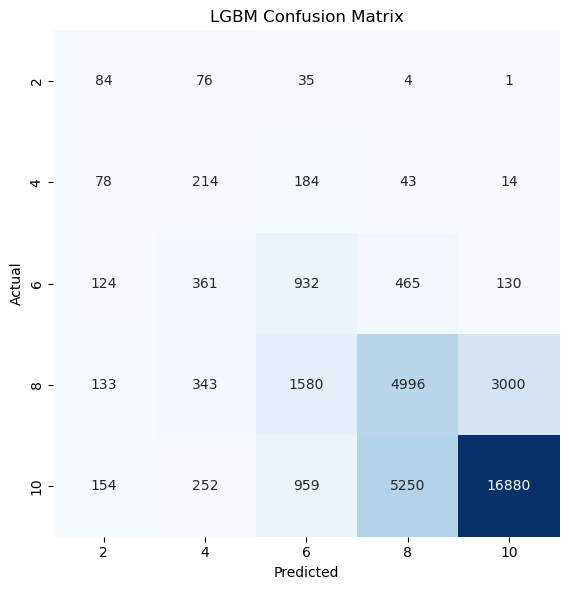

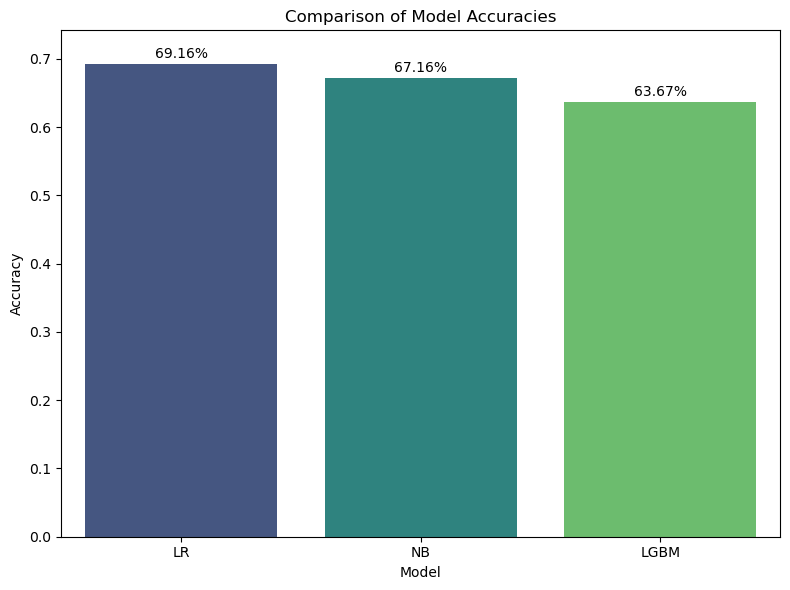

In [102]:
# Initializing a dictionary to hold the accuracy scores
accuracy_scores = {}

# Evaluating each model on the test set and generate reports
for name, model in [("LR", lr_best), ("NB", nb_best), ("LGBM", lgbm_best)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc  # Store the accuracy in the dictionary
    print(f"{name} Model Evaluation:")
    print("-" * 60)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['2', '4', '6', '8', '10']))
    print(f"{name} Confusion Matrix:")
    plt.figure(figsize=(6, 6))
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(ticks=np.arange(5) + 0.5, labels=['2', '4', '6', '8', '10'])
    plt.yticks(ticks=np.arange(5) + 0.5, labels=['2', '4', '6', '8', '10'])
    plt.tight_layout() 
    plt.show()


# Visualization of model accuracies with percentages on top
plt.figure(figsize=(8, 6))
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())
barplot = sns.barplot(x=model_names, y=accuracies, palette='viridis')

# Adding percentage on top of each bar
for i, value in enumerate(accuracies):
    barplot.text(i, value + 0.005, f"{value:.2%}", ha='center', va='bottom')

plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, max(accuracies) + 0.05)
plt.tight_layout()
plt.show()


## Deep learning

In [103]:
#Deep Learning Specific Libraries in addition to above

from tensorflow.keras.utils import to_categorical  # Converts class vector (integers) to binary class matrix
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizes texts into a sequence of integers
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Pads sequences to the same length
from tensorflow.keras.models import Sequential, Model  # For defining and working with Sequential models and general Model class in Keras
from tensorflow.keras.layers import Embedding  # Constructs embedding layers for neural networks
from tensorflow.keras.layers import LSTM  # Implements Long Short Term Memory layers in neural networks
from tensorflow.keras.layers import Dense  # Creates densely-connected neural network layers
from tensorflow.keras.layers import Dropout  # Adds dropout regularization to neural network layers
from tensorflow.keras.callbacks import EarlyStopping  # Defines Early Stopping callback in neural network training
from sklearn.metrics import balanced_accuracy_score  # Calculates balanced accuracy score to deal with imbalanced datasets
from numpy import argmax  # Converts array elements into discrete integer values
from tensorflow.keras.optimizers import Adam  # Defines the Adam optimizer in neural network training
from tensorflow.keras.layers import Input, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM, Dense, concatenate  # For convolutional layer operations in neural networks
from tensorflow.keras.layers import concatenate  # Concatenates tensor outputs in neural network layers
from tensorflow.keras.regularizers import l2  # Implements regularization techniques in neural networks
import tensorflow as tf  # Uses functionalities of TensorFlow, including backend operations
from imblearn.over_sampling import SMOTE  # Implements the SMOTE technique for handling imbalanced datasets
from imblearn.keras import balanced_batch_generator  # Generates balanced batches for keras models
from imblearn.under_sampling import NearMiss  # Applies undersampling techniques to handle imbalanced datasets
from sklearn.preprocessing import label_binarize  # Converts labels to a binary matrix representation
from sklearn.metrics import roc_curve, auc  # Computes the receiver operating characteristic curve and area under the curve
from sklearn.utils import class_weight  # Calculates class weights
from tensorflow.keras import backend as K # Importing backend module from TensorFlow Keras for low-level operations

### Code Logic 3

Features selected based on Domain knowledge and implementation using CNN model

In [105]:

target = 'Rating'
runway_df_cleaned['Combined_Reviews'] = runway_df_cleaned['Processed_Review_Text_Lemmatize'] + " " + runway_df_cleaned['Processed_Review_Summary_Lemmatize']

# Parameters
max_vocab_size = 5000
embedding_dim = 50
max_length = 100 
num_filters = 128
kernel_size = 5
num_classes = len(np.unique(runway_df_cleaned[target]))

# Tokenizing the text
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(runway_df_cleaned['Combined_Reviews'])
sequences = tokenizer.texts_to_sequences(runway_df_cleaned['Combined_Reviews'])

# Padding the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encoding the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(runway_df_cleaned[target])
categorical_labels = to_categorical(encoded_labels, num_classes=num_classes)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)

# CNN model architecture
cnn_model = Sequential([
    Embedding(max_vocab_size, embedding_dim, input_length=max_length),
    Conv1D(num_filters, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
cnn_model.summary()

# Training the model
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predictions and classification report
y_pred_nn = cnn_model.predict(X_test)
y_pred_labels = np.argmax(y_pred_nn, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
accuracy_nn = accuracy_score(y_true_labels, y_pred_labels)
class_report_nn = classification_report(y_true_labels, y_pred_labels)

print("\nNeural Network Results:")
print("Total Accuracy:", accuracy_nn)
print("Classification Report:\n", class_report_nn)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           250000    
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           32128     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 283473 (1.08 MB)
Trainable params: 283473 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Code Logic 4

Features selected based on Domain knowledge and implementation using LSTM model

In [106]:

target = 'Rating'

# Parameters
max_vocab_size = 5000
embedding_dim = 50
max_length = 100 
num_classes = len(np.unique(runway_df_cleaned[target]))

# Tokenizing the text
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(runway_df_cleaned['Combined_Reviews'])
sequences = tokenizer.texts_to_sequences(runway_df_cleaned['Combined_Reviews'])

# Padding the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encoding the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(runway_df_cleaned[target])
categorical_labels = to_categorical(encoded_labels, num_classes=num_classes)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)

# LSTM model architecture
lstm_model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

# Compiling the model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
lstm_model.summary()

# Training the model
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# predictions and classification report section
y_pred_nn = lstm_model.predict(X_test)
y_pred_labels = np.argmax(y_pred_nn, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
accuracy_nn = accuracy_score(y_true_labels, y_pred_labels)
class_report_nn = classification_report(y_true_labels, y_pred_labels)

print("\nNeural Network Results:")
print("Total Accuracy:", accuracy_nn)
print("Classification Report:\n", class_report_nn)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           29440     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 292469 (1.12 MB)
Trainable params: 292469 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3630/36

### Code Logic 5

Features selected based on Domain knowledge and Glove + Embedding preprocessing on Text field and implementation using combination of CNN + LSTM along with class weights for handling Data imbalance

In [108]:

features_combined = runway_df_cleaned['Processed_Review_Text_Lemmatize'] + ' ' + runway_df_cleaned['Processed_Review_Summary_Lemmatize']
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(features_combined)
sequences = tokenizer.texts_to_sequences(features_combined)
padded_sequences = pad_sequences(sequences, maxlen=200)

# Preparing the target variable
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(runway_df_cleaned['Rating'])
target = to_categorical(encoded_labels)

# Calculating class weights
class_weights = compute_class_weight('balanced', classes=np.unique(encoded_labels), y=encoded_labels)
class_weight_dict = dict(enumerate(class_weights))

# to Load GloVe embeddings 
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = 'glove.6B.100d.txt'
embeddings_index = load_glove_embeddings(glove_path)

# Preparing the GloVe embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# to Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, target, test_size=0.2, random_state=42)

# Model architecture with GloVe embeddings
model_improved = Sequential([
    Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=200, trainable=False),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(target.shape[1], activation='softmax')
])

model_improved.compile(optimizer=Adam(learning_rate=0.001), 
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Training the model with EarlyStopping and class weights
history_improved = model_improved.fit(X_train, y_train, 
                                      epochs=50, 
                                      batch_size=128, 
                                      validation_data=(X_test, y_test), 
                                      verbose=2, 
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)],
                                      class_weight=class_weight_dict)

# Evaluating the model
loss_improved, accuracy_improved = model_improved.evaluate(X_test, y_test, verbose=0)
print(f"Improved Deep Learning Model Metrics:\nTest Loss: {loss_improved}\nTest Accuracy: {accuracy_improved}")

# Predictions and classification report
y_pred_nn = model_improved.predict(X_test)
y_pred_labels = np.argmax(y_pred_nn, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
accuracy_nn = accuracy_score(y_true_labels, y_pred_labels)
class_report_nn = classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_.astype(str))

print("\nNeural Network Results:")
print("Total Accuracy:", accuracy_nn)
print("Classification Report:\n", class_report_nn)




Epoch 1/50
1135/1135 - 105s - loss: 1.3818 - accuracy: 0.4717 - val_loss: 0.9429 - val_accuracy: 0.5976 - 105s/epoch - 93ms/step
Epoch 2/50
1135/1135 - 104s - loss: 1.2540 - accuracy: 0.5274 - val_loss: 1.4627 - val_accuracy: 0.3240 - 104s/epoch - 92ms/step
Epoch 3/50
1135/1135 - 103s - loss: 1.2080 - accuracy: 0.5488 - val_loss: 1.2141 - val_accuracy: 0.5161 - 103s/epoch - 90ms/step
Epoch 4/50
1135/1135 - 92s - loss: 1.1645 - accuracy: 0.5622 - val_loss: 1.0652 - val_accuracy: 0.5228 - 92s/epoch - 81ms/step
Epoch 5/50
1135/1135 - 98s - loss: 1.1391 - accuracy: 0.5638 - val_loss: 0.8606 - val_accuracy: 0.6250 - 98s/epoch - 86ms/step
Epoch 6/50
1135/1135 - 90s - loss: 1.1263 - accuracy: 0.5631 - val_loss: 0.9126 - val_accuracy: 0.5848 - 90s/epoch - 79ms/step
Epoch 7/50
1135/1135 - 92s - loss: 1.1016 - accuracy: 0.5732 - val_loss: 0.9133 - val_accuracy: 0.6011 - 92s/epoch - 81ms/step
Epoch 8/50
1135/1135 - 92s - loss: 1.0932 - accuracy: 0.5687 - val_loss: 0.9551 - val_accuracy: 0.6021 -

### Code Logic 6

Features selected based on Correlation matrix and Tokenizing Text field and implementation using combination of CNN + LSTM along with class wieghts for handling Imbalance

In [109]:

# Combining review text and summary for vectorization
features_combined = runway_df_cleaned['Processed_Review_Text_Lemmatize'] + ' ' + runway_df_cleaned['Processed_Review_Summary_Lemmatize']

# Tokenizing and pad text sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(features_combined)
sequences = tokenizer.texts_to_sequences(features_combined)
text_data = pad_sequences(sequences, maxlen=200)

# to Process numerical data
numerical_features = runway_df_cleaned[['Days_Since_Review', 'Height(cm)']].values
numerical_features = MinMaxScaler().fit_transform(numerical_features)

# to Process categorical data
body_type = pd.get_dummies(runway_df_cleaned['Body_Type']).values

# Frequency encode 'Item_Id'
item_id_frequency = runway_df_cleaned['Item_Id'].map(runway_df_cleaned['Item_Id'].value_counts(normalize=True))
item_id_encoded = item_id_frequency.values.reshape(-1, 1)

# Encoding target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(runway_df_cleaned['Rating'])
y_categorical = to_categorical(y_encoded)

# Splitting dataset
X_train_text, X_test_text, X_train_num, X_test_num, X_train_cat, X_test_cat, X_train_item, X_test_item, y_train, y_test = train_test_split(
    text_data, numerical_features, body_type, item_id_encoded, y_categorical, test_size=0.2, random_state=42)

# CNN + LSTM model architecture
def build_model():
    text_input = Input(shape=(200,), name='text_input')
    num_input = Input(shape=(2,), name='num_input')
    cat_input = Input(shape=(X_train_cat.shape[1],), name='cat_input')
    item_input = Input(shape=(1,), name='item_input')
    
    text_branch = Embedding(5000, 64)(text_input)
    text_branch = Conv1D(32, 5, activation='relu')(text_branch)
    text_branch = MaxPooling1D(4)(text_branch)
    text_branch = LSTM(64)(text_branch)
    
    concat = concatenate([text_branch, num_input, cat_input, item_input])
    x = Dense(64, activation='relu')(concat)
    x = Dropout(0.5)(x)
    output = Dense(y_categorical.shape[1], activation='softmax')(x)
    
    model = Model(inputs=[text_input, num_input, cat_input, item_input], outputs=output)
    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

# to Compute class weights 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit([X_train_text, X_train_num, X_train_cat, X_train_item], y_train, epochs=50, batch_size=256,
          validation_data=([X_test_text, X_test_num, X_test_cat, X_test_item], y_test),
          callbacks=[early_stopping], class_weight=class_weight_dict)

# Evaluating the model
loss, accuracy = model.evaluate([X_test_text, X_test_num, X_test_cat, X_test_item], y_test)
print(f"Test Loss: {loss}\nTest Accuracy: {accuracy}")

#  predictions and classification report
y_pred_probs = model.predict([X_test_text, X_test_num, X_test_cat, X_test_item])
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_.astype(str)))


Epoch 1/50
568/568 [==============================] - 66s 110ms/step - loss: 1.2562 - accuracy: 0.5064 - val_loss: 0.9779 - val_accuracy: 0.5712
Epoch 2/50
568/568 [==============================] - 60s 105ms/step - loss: 1.0276 - accuracy: 0.6199 - val_loss: 0.9043 - val_accuracy: 0.5868
Epoch 3/50
568/568 [==============================] - 63s 111ms/step - loss: 0.9215 - accuracy: 0.6336 - val_loss: 0.8066 - val_accuracy: 0.6346
Epoch 4/50
568/568 [==============================] - 61s 107ms/step - loss: 0.8122 - accuracy: 0.6394 - val_loss: 0.9005 - val_accuracy: 0.5988
Epoch 5/50
568/568 [==============================] - 60s 106ms/step - loss: 0.7112 - accuracy: 0.6438 - val_loss: 0.8229 - val_accuracy: 0.6480
Epoch 6/50
1135/1135 [==============================] - 15s 13ms/step - loss: 0.8066 - accuracy: 0.6346
Test Loss: 0.8065915107727051
Test Accuracy: 0.6346302032470703
1135/1135 [==============================] - 14s 12ms/step
              precision    recall  f1-score   su

### Code Logic 7

Features selected from Domain Knowledge with Tokenizing Text fields, combination of Focal loss and class weight data imbalance handling and binary classfication for higher(8,10) and lower(2,4,6) rating using combination of CNN + LSTM

Epoch 1/50
908/908 - 55s - loss: 2.9046 - accuracy: 0.9257 - val_loss: 2.4643 - val_accuracy: 0.9408 - 55s/epoch - 60ms/step
Epoch 2/50
908/908 - 56s - loss: 2.1022 - accuracy: 0.9390 - val_loss: 2.5455 - val_accuracy: 0.9385 - 56s/epoch - 61ms/step
Epoch 3/50
908/908 - 61s - loss: 1.4833 - accuracy: 0.9542 - val_loss: 2.9859 - val_accuracy: 0.9302 - 61s/epoch - 68ms/step
Epoch 4/50
Restoring model weights from the end of the best epoch: 1.
908/908 - 57s - loss: 0.9592 - accuracy: 0.9703 - val_loss: 4.8013 - val_accuracy: 0.9387 - 57s/epoch - 62ms/step
Epoch 4: early stopping
1135/1135 - 9s - loss: 0.6189 - accuracy: 0.9386 - 9s/epoch - 8ms/step
Loss: 0.6188903450965881
Accuracy: 0.9386366009712219
1135/1135 [==============================] - 10s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      2745
           1       0.97      0.96      0.97     33547

    accuracy                           0.94   

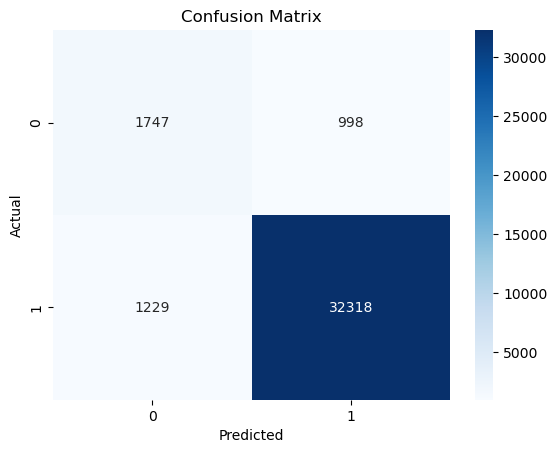

In [111]:

# Defining Focal Loss
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.sum((1-alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

X = runway_df_cleaned['Processed_Review_Text_Lemmatize'] + ' ' + runway_df_cleaned['Processed_Review_Summary_Lemmatize']

# to Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=200)

# to Prepare the target variable for binary classification
# Condition to predict high (>=8) vs low( 2, 4, 6)
runway_df_cleaned['Rating_Binary'] = (runway_df_cleaned['Rating'] >= 8).astype(int)
y = runway_df_cleaned['Rating_Binary'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Calculating class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# CNN model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=100, input_length=200), 
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model with Focal Loss
model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])

batch_size = 128
epochs = 50

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

# Training the model with class weights
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, class_weight=class_weights_dict, callbacks=[early_stopping], verbose=2)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {loss}\nAccuracy: {accuracy}")

# Predictions and Classification Report
y_pred_probs = model.predict(X_test).ravel()
y_pred_labels = (y_pred_probs > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Features selected from Domain Knowledge with Tokenizing Text fields, combination of SMOTE and class weight data imbalance handling and Multi-class classification for 2, 4 and 6 rating using combination of CNN + LSTM

Epoch 1/50
302/302 - 20s - loss: 0.9693 - accuracy: 0.4853 - val_loss: 0.8373 - val_accuracy: 0.5559 - 20s/epoch - 68ms/step
Epoch 2/50
302/302 - 15s - loss: 0.7674 - accuracy: 0.5960 - val_loss: 0.7908 - val_accuracy: 0.5850 - 15s/epoch - 50ms/step
Epoch 3/50
302/302 - 17s - loss: 0.6677 - accuracy: 0.6435 - val_loss: 0.8180 - val_accuracy: 0.5736 - 17s/epoch - 55ms/step
Epoch 4/50
302/302 - 16s - loss: 0.5959 - accuracy: 0.6806 - val_loss: 0.8647 - val_accuracy: 0.5860 - 16s/epoch - 54ms/step
Epoch 5/50
Restoring model weights from the end of the best epoch: 2.
302/302 - 17s - loss: 0.5452 - accuracy: 0.7138 - val_loss: 0.9485 - val_accuracy: 0.5520 - 17s/epoch - 58ms/step
Epoch 5: early stopping
189/189 - 2s - loss: 0.7889 - accuracy: 0.5864 - 2s/epoch - 9ms/step
Test Loss: 0.7889, Test Accuracy: 58.64%
189/189 [==============================] - 2s 10ms/step

Accuracy: 0.5864187282085339

Classification Report:
               precision    recall  f1-score   support

           2    

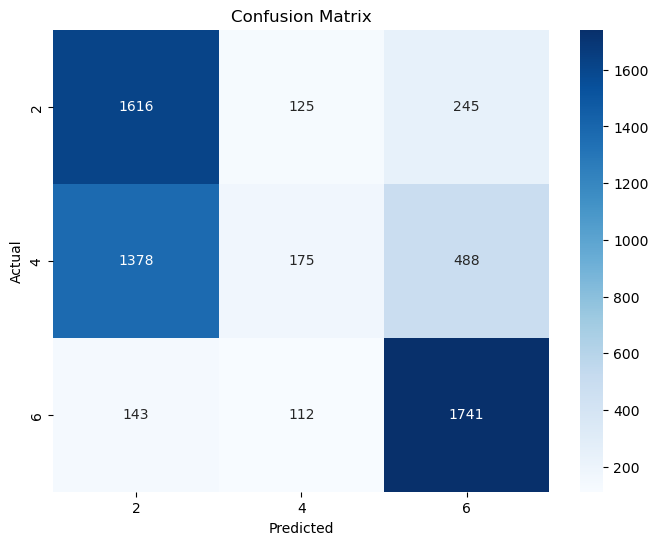

In [118]:

# Filter records with specific ratings
filtered_data = runway_df_cleaned[runway_df_cleaned['Rating'].isin([2, 4, 6])]

# Combine Processed_Review_Text and Processed_Review_Summary for each record
X = filtered_data['Processed_Review_Text_Lemmatize'] + ' ' + filtered_data['Processed_Review_Summary_Lemmatize']
y = filtered_data['Rating']

# Encoding the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenizing text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=200) 

# SMOTE to handle imbalanced classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_encoded)

# Computing class weights for the resampled data
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Splitting the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Building the CNN+LSTM Model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=200),
    Conv1D(filters=32, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_resampled)), activation='softmax')
])

# Compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
    metrics=['accuracy']
)

# Implementing Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)
# Training the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=2, class_weight=class_weight_dict,
    callbacks=[early_stopping])

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Printing the evaluation metrics
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%')

# Predictions and Classification Report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# to Convert predictions and test labels back to original class labels
y_pred_labels_original = label_encoder.inverse_transform(y_pred_labels)
y_test_original = label_encoder.inverse_transform(y_test)

print("\nAccuracy:", accuracy_score(y_test_original, y_pred_labels_original))
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_labels_original, labels=[2, 4, 6]))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_original, y_pred_labels_original, labels=[2, 4, 6])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[2, 4, 6], yticklabels=[2, 4, 6])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Features selected from Domain knowledge with Tokenizing Text fields , class weight data imbalance handling and binary classfication between 8 and 10 rating using combination of CNN + LSTM

Epoch 1/50
840/840 - 60s - loss: 0.6015 - accuracy: 0.6718 - val_loss: 0.5723 - val_accuracy: 0.7038 - 60s/epoch - 72ms/step
Epoch 2/50
840/840 - 53s - loss: 0.5500 - accuracy: 0.7287 - val_loss: 0.5572 - val_accuracy: 0.7080 - 53s/epoch - 64ms/step
Epoch 3/50
840/840 - 53s - loss: 0.5261 - accuracy: 0.7454 - val_loss: 0.5420 - val_accuracy: 0.7209 - 53s/epoch - 63ms/step
Epoch 4/50
840/840 - 52s - loss: 0.5030 - accuracy: 0.7579 - val_loss: 0.5258 - val_accuracy: 0.7362 - 52s/epoch - 62ms/step
Epoch 5/50
840/840 - 53s - loss: 0.4774 - accuracy: 0.7742 - val_loss: 0.5570 - val_accuracy: 0.7133 - 53s/epoch - 63ms/step
Epoch 6/50
840/840 - 53s - loss: 0.4525 - accuracy: 0.7892 - val_loss: 0.6000 - val_accuracy: 0.6966 - 53s/epoch - 63ms/step
Epoch 7/50
Restoring model weights from the end of the best epoch: 4.
840/840 - 52s - loss: 0.4240 - accuracy: 0.8061 - val_loss: 0.5639 - val_accuracy: 0.7353 - 52s/epoch - 62ms/step
Epoch 7: early stopping
1049/1049 - 12s - loss: 0.5268 - accuracy:

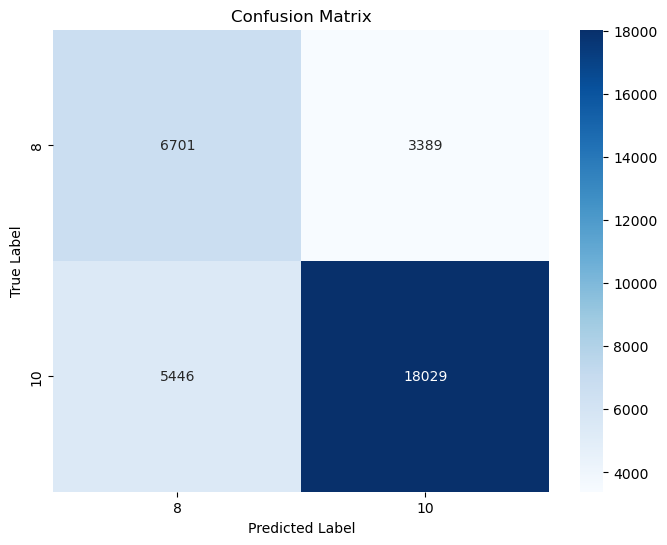

In [119]:
# Filter out records with ratings 8 and 10 for a binary classification task
filtered_data = runway_df_cleaned[runway_df_cleaned['Rating'].isin([8, 10])]

# Combine Processed_Review_Text and Processed_Review_Summary for each record
X = filtered_data['Processed_Review_Text_Lemmatize'] + ' ' + filtered_data['Processed_Review_Summary_Lemmatize']
y = filtered_data['Rating']

# Encoding the labels to binary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

# Computing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Tokenizing text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=200)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Building the CNN+LSTM Model

# Reduced complexity and increased dropout
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=200),
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # Reduced kernel size
    MaxPooling1D(pool_size=4),
    LSTM(32, dropout=0.3, recurrent_dropout=0.3),  # Reduced LSTM units and increased dropout
    Dense(32, activation='relu'),  # Reduced Dense units
    Dropout(0.6),  # Increased dropout
    Dense(1, activation='sigmoid')
])

# Compiling the model with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Reduced learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Implementing Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# training with Early Stopping and increased batch size
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,  # Increased batch size
    validation_split=0.2,
    verbose=2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# evaluation metrics
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%')

# using Inverse transform numerical labels to original labels for reporting
y_pred_probs = model.predict(X_test)
y_pred_labels = (y_pred_probs > 0.5).astype(int)
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels_labels = label_encoder.inverse_transform(y_pred_labels)

# Printing the evaluation metrics with original labels
print(classification_report(y_test_labels, y_pred_labels_labels))


# confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels_labels)

# visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Code Logic 8

Features selected from correlation matrix with Tokenizing Text fields and encoding and scaling other fields, class weight data imbalance handling and binary classfication for higher(8,10) and lower(2,4,6) rating using combination of CNN + LSTM

Epoch 1/50
908/908 - 68s - loss: 0.6051 - accuracy: 0.8890 - val_loss: 0.3543 - val_accuracy: 0.9310 - 68s/epoch - 75ms/step
Epoch 2/50
908/908 - 63s - loss: 0.3424 - accuracy: 0.9284 - val_loss: 0.2468 - val_accuracy: 0.9352 - 63s/epoch - 69ms/step
Epoch 3/50
908/908 - 63s - loss: 0.2615 - accuracy: 0.9298 - val_loss: 0.2055 - val_accuracy: 0.9313 - 63s/epoch - 70ms/step
Epoch 4/50
908/908 - 62s - loss: 0.2226 - accuracy: 0.9319 - val_loss: 0.1820 - val_accuracy: 0.9359 - 62s/epoch - 69ms/step
Epoch 5/50
908/908 - 63s - loss: 0.2035 - accuracy: 0.9346 - val_loss: 0.1856 - val_accuracy: 0.9270 - 63s/epoch - 70ms/step
Epoch 6/50
908/908 - 63s - loss: 0.1923 - accuracy: 0.9371 - val_loss: 0.1764 - val_accuracy: 0.9315 - 63s/epoch - 69ms/step
Epoch 7/50
908/908 - 64s - loss: 0.1839 - accuracy: 0.9380 - val_loss: 0.1743 - val_accuracy: 0.9320 - 64s/epoch - 70ms/step
Epoch 8/50
908/908 - 63s - loss: 0.1770 - accuracy: 0.9400 - val_loss: 0.1757 - val_accuracy: 0.9308 - 63s/epoch - 69ms/step


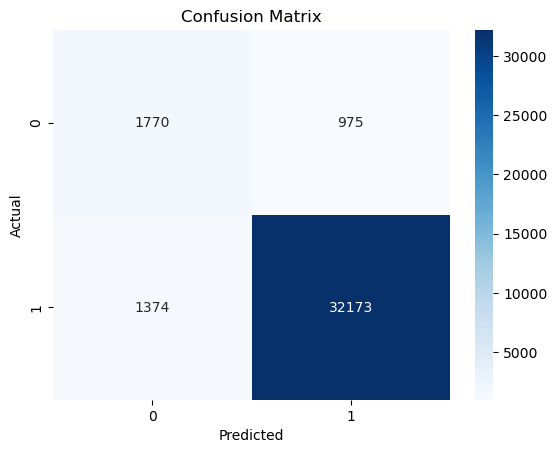

In [120]:
# Combining text features for tokenization
features_combined = runway_df_cleaned['Processed_Review_Text_Lemmatize'] + ' ' + runway_df_cleaned['Processed_Review_Summary_Lemmatize']

# Tokenizing and padding sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(features_combined)
sequences = tokenizer.texts_to_sequences(features_combined)
text_data = pad_sequences(sequences, maxlen=200)

# to Process numerical and categorical data
numerical_features = runway_df_cleaned[['Days_Since_Review', 'Height(cm)']].values
numerical_features = MinMaxScaler().fit_transform(numerical_features)  # Normalize numerical features

# One-hot encoding for categorical data
cat_features = OneHotEncoder().fit_transform(runway_df_cleaned[['Body_Type']]).toarray()

# Frequency encoding 'Item_Id'
item_id = runway_df_cleaned['Item_Id']
frequency_encoding = item_id.map(item_id.value_counts(normalize=True))
item_id_encoded = frequency_encoding.values.reshape(-1, 1)  # Reshape for concatenation

# Preparing the target variable for binary classification
runway_df_cleaned['Rating_Binary'] = (runway_df_cleaned['Rating'] >= 8).astype(int)
y = runway_df_cleaned['Rating_Binary'].values

# Calculating class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Splitting the dataset
X_train_text, X_test_text, X_train_num, X_test_num, X_train_cat, X_test_cat, X_train_item, X_test_item, y_train, y_test = train_test_split(
    text_data, numerical_features, cat_features, item_id_encoded, y, 
    test_size=0.2, random_state=42)

#  multi-input model architecture
text_input = Input(shape=(200,), name='text_input')
num_input = Input(shape=(2,), name='num_input')  
cat_input = Input(shape=(cat_features.shape[1],), name='cat_input')
item_input = Input(shape=(1,), name='item_input')

# Embedding layer for text input
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=200)(text_input)
conv1d_layer = Conv1D(32, kernel_size=5, activation='relu')(embedding_layer)
maxpool1d_layer = MaxPooling1D(pool_size=4)(conv1d_layer)
lstm_layer = LSTM(32, dropout=0.4, recurrent_dropout=0.4)(maxpool1d_layer)

# Concatenate all input layers
concatenated_layers = concatenate([lstm_layer, num_input, cat_input, item_input])

dense_layer_1 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(concatenated_layers)
dropout_layer = Dropout(0.6)(dense_layer_1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Compiling the model
model = tf.keras.Model(inputs=[text_input, num_input, cat_input, item_input], outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

# Fitting the model with early stopping and class weights
model.fit({'text_input': X_train_text, 'num_input': X_train_num, 'cat_input': X_train_cat, 'item_input': X_train_item}, y_train,
          epochs=50,
          batch_size=128,
          validation_split=0.2,
          verbose=2,
          class_weight=class_weight_dict,
          callbacks=[early_stopping])


# Initializing a list to store accuracy results for each model
accuracy_results_high_low = []
accuracy_results_2_4_6 = []
accuracy_results_8_10 = []

# Evaluating the model on the test set
loss, accuracy = model.evaluate({'text_input': X_test_text, 'num_input': X_test_num, 'cat_input': X_test_cat, 'item_input': X_test_item}, y_test, verbose=2)
print(f"Loss: {loss}\nAccuracy: {accuracy}")

# Appending the accuracy to the results list
accuracy_results_high_low.append(accuracy)

# predictions and classification report
y_pred_probs = model.predict({'text_input': X_test_text, 'num_input': X_test_num, 'cat_input': X_test_cat, 'item_input': X_test_item}).ravel()
y_pred_labels = (y_pred_probs > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))  # Corrected to use y_test directly

# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)  # Corrected to use y_test directly
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Features selected from correlation matrix with Tokenizing Text fields and encoding and scaling other fields, class weight data imbalance handling and Multi-class classification for 2, 4 and 6 rating using combination of CNN + LSTM

Epoch 1/50
137/137 [==============================] - 12s 61ms/step - loss: 1.0871 - accuracy: 0.3462 - val_loss: 1.0983 - val_accuracy: 0.4207
Epoch 2/50
137/137 [==============================] - 9s 63ms/step - loss: 0.9868 - accuracy: 0.5698 - val_loss: 0.8158 - val_accuracy: 0.6311
Epoch 3/50
137/137 [==============================] - 9s 63ms/step - loss: 0.8381 - accuracy: 0.6438 - val_loss: 0.8479 - val_accuracy: 0.5907
Epoch 4/50
137/137 [==============================] - 8s 58ms/step - loss: 0.7327 - accuracy: 0.6725 - val_loss: 0.9594 - val_accuracy: 0.4940
Epoch 5/50
86/86 [==============================] - 2s 20ms/step - loss: 0.8063 - accuracy: 0.6316
Test Loss: 0.8063384890556335
Test Accuracy: 0.6315982341766357
86/86 [==============================] - 2s 18ms/step

Classification Report:
              precision    recall  f1-score   support

           2       0.21      0.66      0.32       207
           4       0.31      0.17      0.22       559
           6       0.84

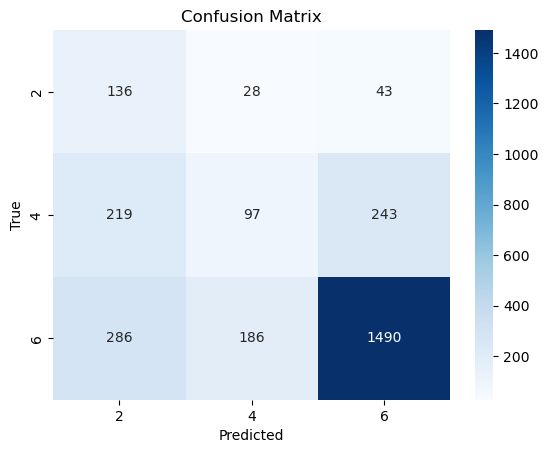

In [138]:

# Filter records with specific ratings
filtered_data = runway_df_cleaned[runway_df_cleaned['Rating'].isin([2, 4, 6])]

# Combine processed review text and summary for tokenization
X_text = filtered_data['Processed_Review_Text_Lemmatize'] + ' ' + filtered_data['Processed_Review_Summary_Lemmatize']
y = filtered_data['Rating']

# Process numerical and categorical features
X_numerical = MinMaxScaler().fit_transform(filtered_data[['Days_Since_Review', 'Height(cm)']])
X_categorical = OneHotEncoder().fit_transform(filtered_data[['Body_Type']]).toarray()

# Item ID frequency encoding
frequency_encoding = filtered_data['Item_Id'].map(filtered_data['Item_Id'].value_counts(normalize=True))
X_item = frequency_encoding.values.reshape(-1, 1)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Tokenizing and padding text sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_text)
X_text_seq = tokenizer.texts_to_sequences(X_text)
X_text_pad = pad_sequences(X_text_seq, maxlen=200)

# Splitting data
X_train_text, X_test_text, X_train_numerical, X_test_numerical, X_train_categorical, X_test_categorical, X_train_item, X_test_item, y_train, y_test = train_test_split(
    X_text_pad, X_numerical, X_categorical, X_item, y_categorical, test_size=0.2, random_state=42)

# Computing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

# multi-input model architecture
text_input = Input(shape=(200,), dtype='int32', name='text_input')
numerical_input = Input(shape=(X_train_numerical.shape[1],), name='numerical_input')
categorical_input = Input(shape=(X_train_categorical.shape[1],), name='categorical_input')
item_input = Input(shape=(1,), name='item_input')

embedding = Embedding(input_dim=5000, output_dim=100, input_length=200)(text_input)
conv1d = Conv1D(filters=64, kernel_size=5, activation='relu')(embedding)
max_pooling = MaxPooling1D(pool_size=4)(conv1d)
lstm = LSTM(64)(max_pooling)

concatenated = concatenate([lstm, numerical_input, categorical_input, item_input], axis=-1)
dense = Dense(64, activation='relu')(concatenated)
dropout = Dropout(0.5)(dense)
output = Dense(y_categorical.shape[1], activation='softmax')(dropout)

model = Model(inputs=[text_input, numerical_input, categorical_input, item_input], outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit([X_train_text, X_train_numerical, X_train_categorical, X_train_item], y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weight_dict)

loss, accuracy = model.evaluate([X_test_text, X_test_numerical, X_test_categorical, X_test_item], y_test)
print(f"Test Loss: {loss}\nTest Accuracy: {accuracy}")

# Append the accuracy to the results list
accuracy_results_2_4_6.append(accuracy)

# Predict and generate classification report
y_pred = model.predict([X_test_text, X_test_numerical, X_test_categorical, X_test_item])
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Inverse transform labels for a readable classification report
y_test_original = label_encoder.inverse_transform(y_true_labels)
y_pred_original = label_encoder.inverse_transform(y_pred_labels)

print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# confusion matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['2', '4', '6'], yticklabels=['2', '4', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Features selected from correlation matrix with Tokenizing Text fields and encoding and scaling other fields, class weight data imbalance handling and binary classfication between 8 and 10 rating using combination of CNN + LSTM

Epoch 1/50
3357/3357 - 170s - loss: 0.6244 - accuracy: 0.6873 - val_loss: 0.5666 - val_accuracy: 0.7151 - 170s/epoch - 51ms/step
Epoch 2/50
3357/3357 - 158s - loss: 0.5527 - accuracy: 0.7293 - val_loss: 0.5301 - val_accuracy: 0.7308 - 158s/epoch - 47ms/step
Epoch 3/50
3357/3357 - 160s - loss: 0.5294 - accuracy: 0.7463 - val_loss: 0.5226 - val_accuracy: 0.7374 - 160s/epoch - 48ms/step
Epoch 4/50
3357/3357 - 158s - loss: 0.5081 - accuracy: 0.7606 - val_loss: 0.5643 - val_accuracy: 0.7088 - 158s/epoch - 47ms/step
Epoch 5/50
3357/3357 - 160s - loss: 0.4844 - accuracy: 0.7769 - val_loss: 0.5327 - val_accuracy: 0.7329 - 160s/epoch - 48ms/step
Epoch 6/50
3357/3357 - 160s - loss: 0.4607 - accuracy: 0.7900 - val_loss: 0.5618 - val_accuracy: 0.7241 - 160s/epoch - 48ms/step
1049/1049 - 10s - loss: 0.5249 - accuracy: 0.7359 - 10s/epoch - 9ms/step
Test Loss: 0.5249, Test Accuracy: 73.59%
1049/1049 [==============================] - 11s 10ms/step

Classification Report:
              precision    re

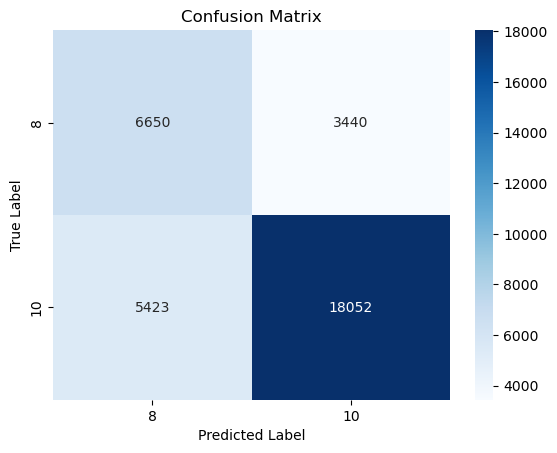

In [136]:

# Filter out records with ratings 8 and 10 for a binary classification task
filtered_data = runway_df_cleaned[runway_df_cleaned['Rating'].isin([8, 10])]

X_text = filtered_data['Processed_Review_Text_Lemmatize'] + ' ' + filtered_data['Processed_Review_Summary_Lemmatize']
X_numerical = MinMaxScaler().fit_transform(filtered_data[['Days_Since_Review', 'Height(cm)']])
X_categorical = OneHotEncoder(sparse=False).fit_transform(filtered_data[['Body_Type']])

frequency_encoding = filtered_data['Item_Id'].map(filtered_data['Item_Id'].value_counts(normalize=True))
X_item = frequency_encoding.values.reshape(-1, 1)

# Encode the labels to binary (0 for rating 8, 1 for rating 10)
y = (filtered_data['Rating'] == 10).astype(int)

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text)
X_seq = tokenizer.texts_to_sequences(X_text)
X_pad = pad_sequences(X_seq, maxlen=200)

X_train_text, X_test_text, X_train_num, X_test_num, X_train_cat, X_test_cat, X_train_item, X_test_item, y_train, y_test = train_test_split(
    X_pad, X_numerical, X_categorical, X_item, y, test_size=0.2, random_state=42)

# Multi-input model architecture
text_input = Input(shape=(200,), name='text_input')
numerical_input = Input(shape=(2,), name='numerical_input')
categorical_input = Input(shape=(X_categorical.shape[1],), name='categorical_input')
item_input = Input(shape=(1,), name='item_input')

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=200)(text_input)
conv1d_layer = Conv1D(filters=32, kernel_size=3, activation='relu')(embedding_layer)
maxpooling_layer = MaxPooling1D(pool_size=4)(conv1d_layer)
lstm_layer = LSTM(64, dropout=0.3, recurrent_dropout=0.3)(maxpooling_layer)

dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(concatenate([lstm_layer, numerical_input, categorical_input, item_input]))
dropout_layer = Dropout(0.6)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

model = Model(inputs=[text_input, numerical_input, categorical_input, item_input], outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit([X_train_text, X_train_num, X_train_cat, X_train_item], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2, class_weight=class_weight_dict, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate([X_test_text, X_test_num, X_test_cat, X_test_item], y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%')

# Append the accuracy to the results list
accuracy_results_8_10.append(test_accuracy)

y_pred = model.predict([X_test_text, X_test_num, X_test_cat, X_test_item])

# Convert predictions from probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Inverse transform the binary predictions and true labels to their original label format (8 or 10)
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_binary)

# Updated classification report and confusion matrix to reflect original labels (8, 10)
target_names = ['8', '10'] 
class_report = classification_report(y_test_original, y_pred_original, target_names=target_names)

print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test_original, y_pred_original)

# Visualize the confusion matrix with a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['8', '10'], yticklabels=['8', '10'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [143]:
print(accuracy_results_high_low[-1])
print(accuracy_results_2_4_6[-1])
print(accuracy_results_8_10[-1])

0.9352750182151794
0.6315982341766357
0.7359451651573181


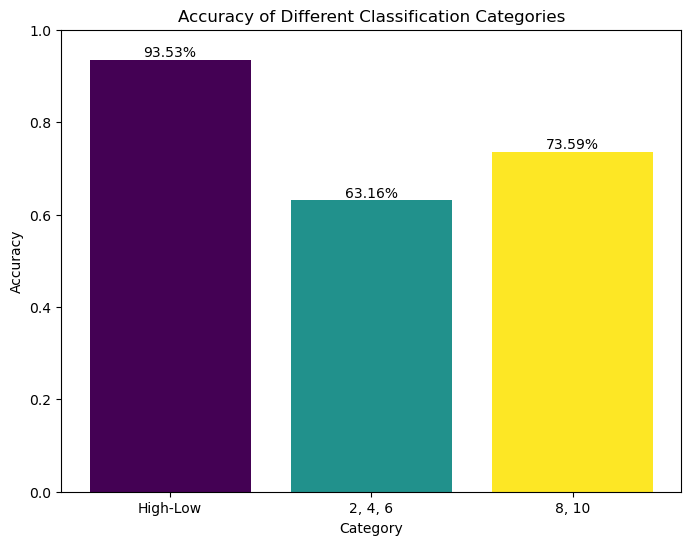

In [142]:

# Categories for the classification types
categories = ['High-Low', '2, 4, 6', '8, 10']

# Combine the accuracies into a single list for plotting
accuracies = [accuracy_results_high_low[-1], accuracy_results_2_4_6[-1], accuracy_results_8_10[-1]]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, accuracies, color=plt.cm.viridis(np.linspace(0, 1, len(accuracies))))

plt.title('Accuracy of Different Classification Categories')
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add percentages on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', ha='center', va='bottom', color='black')

plt.show()
